# 1. File Preperation 

In [1]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [3]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [4]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

data_helpful = data[data['helpful_vote'] != 0]


# 2. Statistic of features

First of all we want to look at different features that could be extracted from the review data. Therefore I built some functions for easier data handling and statistical analysis of the features. 

## Functions for Building Summary statistic 

In [5]:
# Convert Sentiment_Classification to Numerical
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Map the sentiment column to numerical values
data_helpful['Sentiment Numerical'] = data_helpful['Sentiment_Classification'].map(sentiment_mapping)
data['Sentiment Numerical'] = data['Sentiment_Classification'].map(sentiment_mapping)

data_utilitarian['Sentiment Numerical'] = data_utilitarian['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic['Sentiment Numerical'] = data_hedonic['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic_raw['Sentiment Numerical'] = data_hedonic_raw['Sentiment_Classification'].map(sentiment_mapping)
data_utilitarian_raw['Sentiment Numerical'] = data_utilitarian_raw['Sentiment_Classification'].map(sentiment_mapping)

/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_27398/1858388994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_helpful['Sentiment Numerical'] = data_helpful['Sentiment_Classification'].map(sentiment_mapping)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_27398/1858388994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian['Sentiment Numerical'] = data_utilitarian['Sentiment_Classification'].map(sentiment_mapping)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000

In [6]:
# Function for building summary statistics for numerical columns

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ['helpful_ratio','rating', 'sentiment', 'subjective_score', 'word_count', 
                         'sent_count', 'sent_length', 'title_length', 'review_ext', 
                         '#adj', '#adv', '#nouns', 'elap_days', 'image', 'FRE','Sentiment Numerical']

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'median', 'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transposing the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

In [7]:
# Only calculate for the mean of the numerical columns

def calculate_mean(df, groupby_column):
    # Group by the specified column and calculate aggregate statistics
    summary_mean = df.groupby(groupby_column).agg({
        'helpful_ratio': ['mean'],  # Calculate the mean of the 'helpful_ratio' column
        'rating': ['mean'],
        'review_ext': ['mean'],
        'sentiment': ['mean'],
        'subjective_score': ['mean'],
        'word_count': ['mean'],
        'sent_count': ['mean'],
        'sent_length': ['mean'],
        'title_length': ['mean'],
        'FRE': ['mean'],
        '#adj': ['mean'],
        '#adv': ['mean'],
        '#nouns': ['mean'],
        'elap_days': ['mean'],
        'Sentiment Numerical': ['mean'],
    })

    # Flatten the MultiIndex columns
    summary_mean.columns = ['_'.join(col).strip() for col in summary_mean.columns.values]

    # Transpose the DataFrame
    summary_mean = summary_mean.transpose()

    return summary_mean

### Summary Statistic of Helpful Reviews

In the following, a straightforward statistical analysis is conducted without graphical representation, focusing on various factors such as product type or main category.

In [8]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')

prod_type                           0            1
helpful_ratio_mean           0.001436     0.001339
rating_mean                  2.977031     3.827217
review_ext_mean             -1.637611    -0.792044
sentiment_mean               3.003445     3.895794
subjective_score_mean        0.786528     0.820668
word_count_mean             65.070629    51.384141
sent_count_mean              4.240884     3.742834
sent_length_mean            17.103927    15.341133
title_length_mean            1.267873     1.392714
FRE_mean                    79.615877    82.633916
#adj_mean                    0.095079     0.100166
#adv_mean                    0.079453     0.069959
#nouns_mean                  0.187579     0.182989
elap_days_mean            1182.001436  1538.897669
Sentiment Numerical_mean     0.867356     1.390035


In [9]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'main_category')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Category_mean.csv')

main_category              Appliances       Beauty  Electronics     Grocery  \
helpful_ratio_mean           0.001441     0.000849     0.001296    0.001942   
rating_mean                  2.476945     4.029299     2.738172    3.794175   
review_ext_mean             -2.223055    -0.511635    -1.895334   -1.005825   
sentiment_mean               2.540346     4.076433     2.753727    3.850485   
subjective_score_mean        0.782660     0.822641     0.770538    0.811931   
word_count_mean             65.724784    50.067516    76.683085   35.704854   
sent_count_mean              4.582133     3.705732     4.500972    2.970874   
sent_length_mean            16.680019    15.415137    18.657825   14.226983   
title_length_mean            1.276657     1.264544     1.244329    1.588350   
FRE_mean                    76.810620    83.340144    77.264563   79.552330   
#adj_mean                    0.077548     0.101336     0.088839    0.107984   
#adv_mean                    0.071440     0.073082  

In [10]:
# Summary of data after helpful reviews
summary_help_hedonic = calculate_mean(data_hedonic, 'product')

# Display the DataFrame
print(summary_help_hedonic)

# Saving to CSV
summary_help_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Hedonic_mean.csv')

product                    Chocolate  Facial Spray       Music      Perfume  \
helpful_ratio_mean          0.001942      0.000719    0.002427     0.001037   
rating_mean                 3.794175      4.125809    2.788835     3.890041   
review_ext_mean            -1.005825     -0.374191   -1.854369    -0.709959   
sentiment_mean              3.850485      4.186916    3.099515     3.917012   
subjective_score_mean       0.811931      0.827764    0.834365     0.815249   
word_count_mean            35.704854     49.456506   59.092233    50.949170   
sent_count_mean             2.970874      3.653487    4.555825     3.781120   
sent_length_mean           14.226983     14.895422   14.342856    16.165057   
title_length_mean           1.588350      1.258807    1.771845     1.272822   
FRE_mean                   79.552330     82.821280   83.102015    84.088838   
#adj_mean                   0.107984      0.099294    0.102463     0.104282   
#adv_mean                   0.062273      0.072097  

In [11]:
# Summary of data after helpful reviews
summary_help_ut = calculate_mean(data_utilitarian, 'product')

# Display the DataFrame
print(summary_help_ut)

# Saving to CSV
summary_help_ut.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Utilitarian_mean.csv')

product                       Battery       Filter  Gaming Mouse   Hair Brush  \
helpful_ratio_mean           0.000975     0.001441      0.001934     0.001835   
rating_mean                  2.823587     2.476945      2.568665     4.126606   
review_ext_mean             -1.776413    -2.223055     -2.131335    -0.473394   
sentiment_mean               2.811891     2.540346      2.638298     4.099083   
subjective_score_mean        0.758146     0.782660      0.795130     0.840303   
word_count_mean             56.302144    65.724784    117.129594    69.577982   
sent_count_mean              3.787524     4.582133      5.916828     4.737615   
sent_length_mean            16.494291    16.680019     22.951416    16.713614   
title_length_mean            1.277778     1.276657      1.177950     1.260550   
FRE_mean                    78.741764    76.810620     74.333017    84.211083   
#adj_mean                    0.087855     0.077548      0.090790     0.102456   
#adv_mean                   

### Analyzing Mean of Review Data

In [12]:
# Calculating Mean for Data after Main category 
summary_mean = calculate_mean(data, 'main_category')

# Display the summary statistics
print(summary_mean)

# Saving to CSV
summary_mean.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Category_mean.csv')

main_category              Appliances       Beauty  Electronics     Grocery  \
helpful_ratio_mean           0.000192     0.000138     0.000177    0.000288   
rating_mean                  3.976762     4.321394     3.864184    4.474078   
review_ext_mean             -0.723238    -0.234736    -0.771454   -0.325922   
sentiment_mean               3.890148     4.352390     3.822784    4.397465   
subjective_score_mean        0.784201     0.800577     0.778130    0.801484   
word_count_mean             27.000576    26.390550    40.375089   19.938940   
sent_count_mean              2.410793     2.415966     2.864982    2.102535   
sent_length_mean            11.528881    11.825923    14.509245   10.627039   
title_length_mean            1.406952     1.506199     1.317021    1.848502   
FRE_mean                    78.876121    86.893946    80.610742   81.531915   
#adj_mean                    0.125282     0.125501     0.112677    0.124028   
#adv_mean                    0.071905     0.073742  

In [13]:
# Calculating Mean after Producty Type and Data 
summary_stats_data = calculate_mean(data, 'prod_type')

# Print the summary statistics
print(summary_stats_data)

# Saving to CSV
summary_stats_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType_mean.csv')

prod_type                           0            1
helpful_ratio_mean           0.000226     0.000225
rating_mean                  3.982482     4.321237
review_ext_mean             -0.651075    -0.307033
sentiment_mean               3.931556     4.328306
subjective_score_mean        0.790767     0.801894
word_count_mean             35.554479    26.528747
sent_count_mean              2.764067     2.413129
sent_length_mean            13.355088    11.714510
title_length_mean            1.352315     1.591194
FRE_mean                    81.618437    85.972370
#adj_mean                    0.118786     0.120292
#adv_mean                    0.082632     0.070225
#nouns_mean                  0.194156     0.191486
elap_days_mean            1294.805984  1449.665571
Sentiment Numerical_mean     1.308497     1.597632


In [14]:
# Calculating Mean for hedonic products and product
summary_stats_hedonic = calculate_mean(data_hedonic, 'product')

# Display results
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic_mean.csv')

product                    Chocolate  Facial Spray       Music      Perfume  \
helpful_ratio_mean          0.001942      0.000719    0.002427     0.001037   
rating_mean                 3.794175      4.125809    2.788835     3.890041   
review_ext_mean            -1.005825     -0.374191   -1.854369    -0.709959   
sentiment_mean              3.850485      4.186916    3.099515     3.917012   
subjective_score_mean       0.811931      0.827764    0.834365     0.815249   
word_count_mean            35.704854     49.456506   59.092233    50.949170   
sent_count_mean             2.970874      3.653487    4.555825     3.781120   
sent_length_mean           14.226983     14.895422   14.342856    16.165057   
title_length_mean           1.588350      1.258807    1.771845     1.272822   
FRE_mean                   79.552330     82.821280   83.102015    84.088838   
#adj_mean                   0.107984      0.099294    0.102463     0.104282   
#adv_mean                   0.062273      0.072097  

In [15]:
# Calculating Mean for utilitarian products and product
summary_stats_utilitarian = calculate_mean(data_utilitarian, 'product')

# Display results
print(summary_stats_utilitarian)

# Saving to CSV
summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian_mean.csv')

product                       Battery       Filter  Gaming Mouse   Hair Brush  \
helpful_ratio_mean           0.000975     0.001441      0.001934     0.001835   
rating_mean                  2.823587     2.476945      2.568665     4.126606   
review_ext_mean             -1.776413    -2.223055     -2.131335    -0.473394   
sentiment_mean               2.811891     2.540346      2.638298     4.099083   
subjective_score_mean        0.758146     0.782660      0.795130     0.840303   
word_count_mean             56.302144    65.724784    117.129594    69.577982   
sent_count_mean              3.787524     4.582133      5.916828     4.737615   
sent_length_mean            16.494291    16.680019     22.951416    16.713614   
title_length_mean            1.277778     1.276657      1.177950     1.260550   
FRE_mean                    78.741764    76.810620     74.333017    84.211083   
#adj_mean                    0.087855     0.077548      0.090790     0.102456   
#adv_mean                   

### Total Analysis (mean, median, variance)

In [16]:
# Summary of hedonic data
summary_stats_hedonic = summary_statistic(data_hedonic_raw, 'product')

# Display the summary statistics
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic.csv')


product                      Chocolate  Facial Spray       Music      Perfume  \
helpful_ratio_mean            0.000288      0.000157    0.000561     0.000123   
helpful_ratio_median          0.000000      0.000000    0.000000     0.000000   
helpful_ratio_std             0.003646      0.002301    0.003301     0.002201   
rating_mean                   4.474078      4.308369    3.935466     4.331574   
rating_median                 5.000000      5.000000    5.000000     5.000000   
rating_std                    1.183735      1.264015    1.514960     1.228851   
sentiment_mean                4.397465      4.350447    3.953423     4.353908   
sentiment_median              5.000000      5.000000    5.000000     5.000000   
sentiment_std                 1.297061      1.301683    1.517840     1.263092   
subjective_score_mean         0.801484      0.818202    0.815490     0.786802   
subjective_score_median       0.926969      0.908884    0.916730     0.883454   
subjective_score_std        

In [17]:
# Summary of utilitarian data
summary_stats_utilitarian = summary_statistic(data_utilitarian_raw, 'product')

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian.csv')

product                         Battery       Filter  Gaming Mouse  \
helpful_ratio_mean             0.000138     0.000192      0.000249   
helpful_ratio_median           0.000000     0.000000      0.000000   
helpful_ratio_std              0.004702     0.004004      0.006970   
rating_mean                    3.900000     3.976762      3.799502   
rating_median                  5.000000     5.000000      5.000000   
rating_std                     1.552382     1.572562      1.561097   
sentiment_mean                 3.860744     3.890148      3.754229   
sentiment_median               5.000000     5.000000      5.000000   
sentiment_std                  1.676241     1.661475      1.604700   
subjective_score_mean          0.755289     0.784201      0.819381   
subjective_score_median        0.830232     0.851860      0.885371   
subjective_score_std           0.233592     0.209121      0.186372   
word_count_mean               27.602204    27.000576     63.442537   
word_count_median   

In [18]:
# Summary of data after Product Type
summary_stats_prodType = summary_statistic(data, 'prod_type')

# Display the DataFrame
print(summary_stats_prodType)

#Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType.csv')

prod_type                             0            1
helpful_ratio_mean             0.000226     0.000225
helpful_ratio_median           0.000000     0.000000
helpful_ratio_std              0.004625     0.002791
rating_mean                    3.982482     4.321237
rating_median                  5.000000     5.000000
rating_std                     1.511750     1.266600
sentiment_mean                 3.931556     4.328306
sentiment_median               5.000000     5.000000
sentiment_std                  1.600143     1.311158
subjective_score_mean          0.790767     0.801894
subjective_score_median        0.866606     0.902643
subjective_score_std           0.210857     0.228401
word_count_mean               35.554479    26.528747
word_count_median             20.000000    16.000000
word_count_std                48.505235    38.320619
sent_count_mean                2.764067     2.413129
sent_count_median              2.000000     2.000000
sent_count_std                 2.541804     2.

# 3. Correlation Analysis


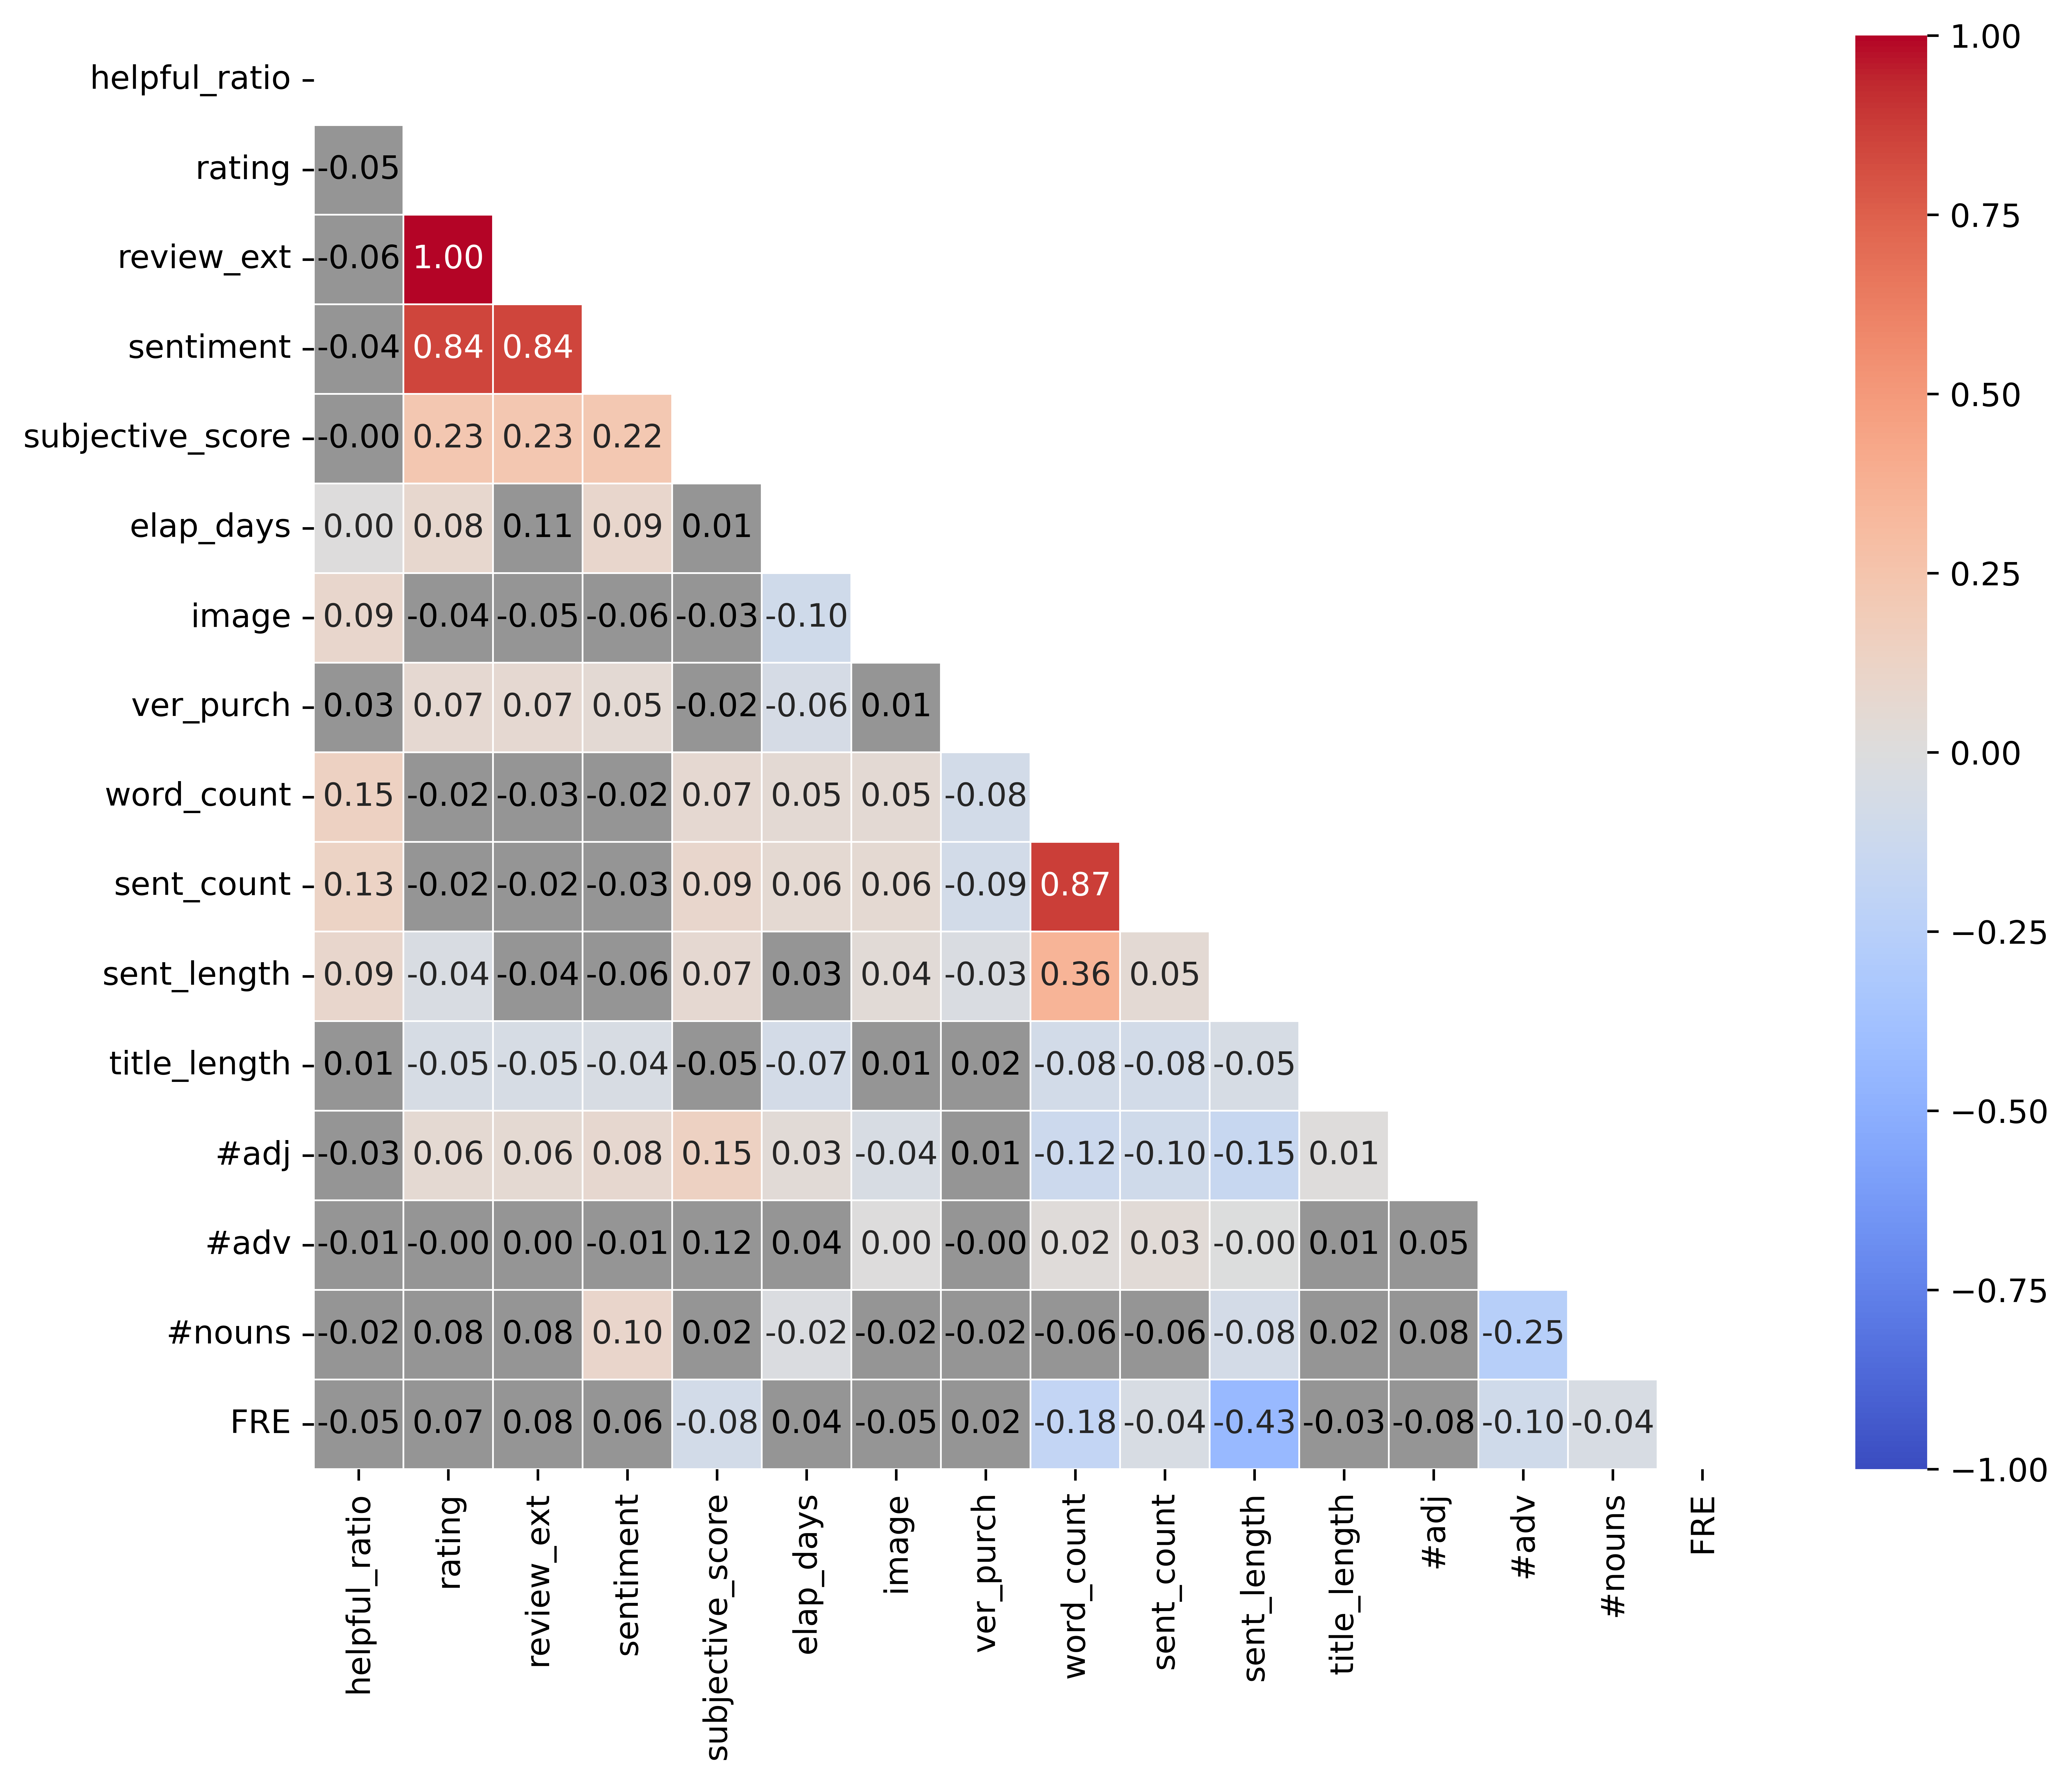

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Assuming data_utilitarian is your DataFrame
features = ['helpful_ratio', 'rating', 'review_ext', 'sentiment', 'subjective_score', 'elap_days', 'image',
            'ver_purch', 'word_count', 'sent_count', 'sent_length', 'title_length', '#adj', '#adv', '#nouns', 'FRE']

# Calculate correlation matrix
corr_matrix_uti = data_hedonic[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_uti.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_utilitarian[features[i]], data_utilitarian[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_uti, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_uti, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_uti, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")


plt.show()


In [20]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(data_utilitarian['FRE'], data_utilitarian['rating'])

print("Correlation coefficient between sentiment and rating:", correlation)
print("P-value:", p_value)


Correlation coefficient between sentiment and rating: -0.006158362592474796
P-value: 0.7163652990770701


# 3. Graphs and Plots for Data analysis 

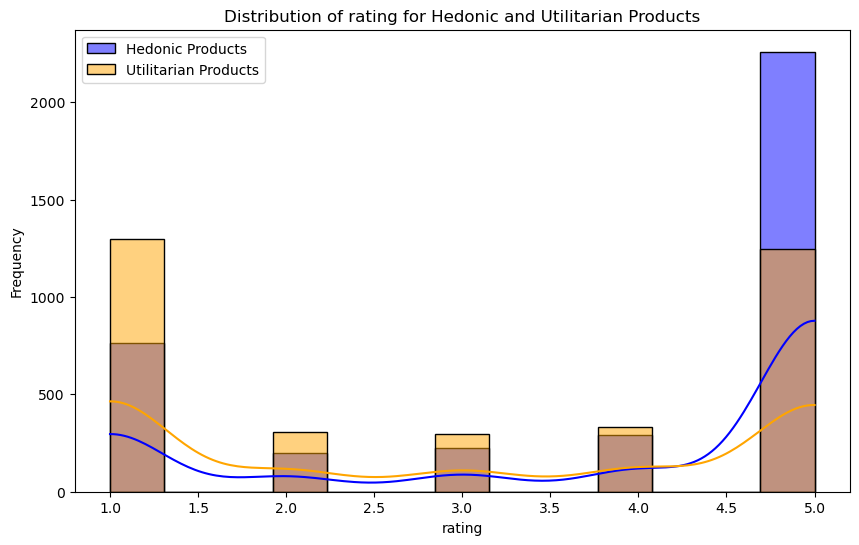

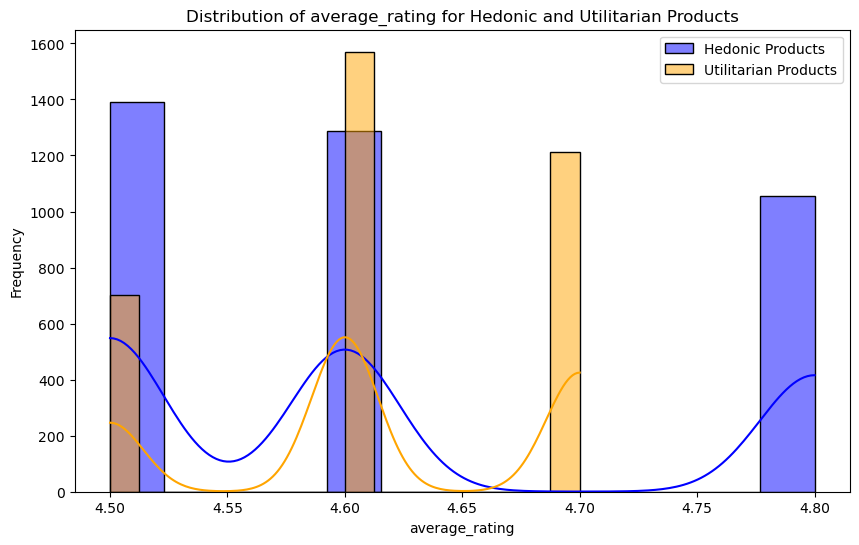

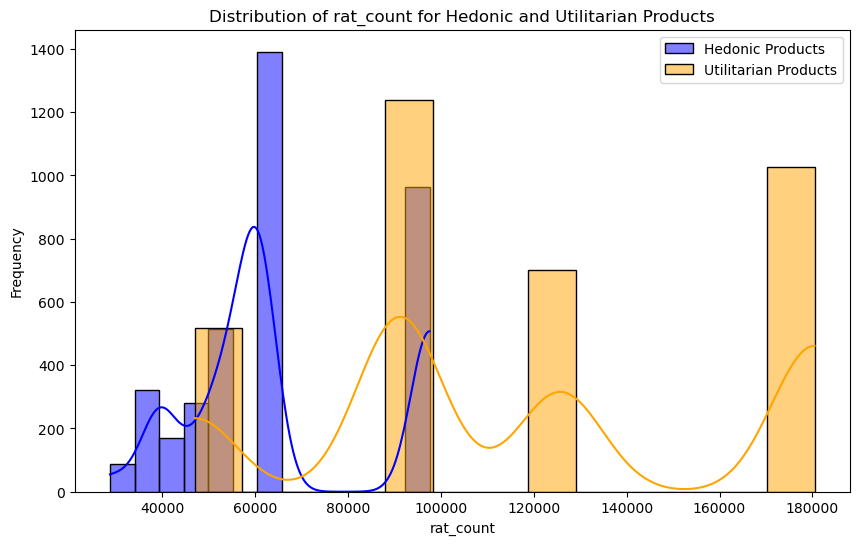

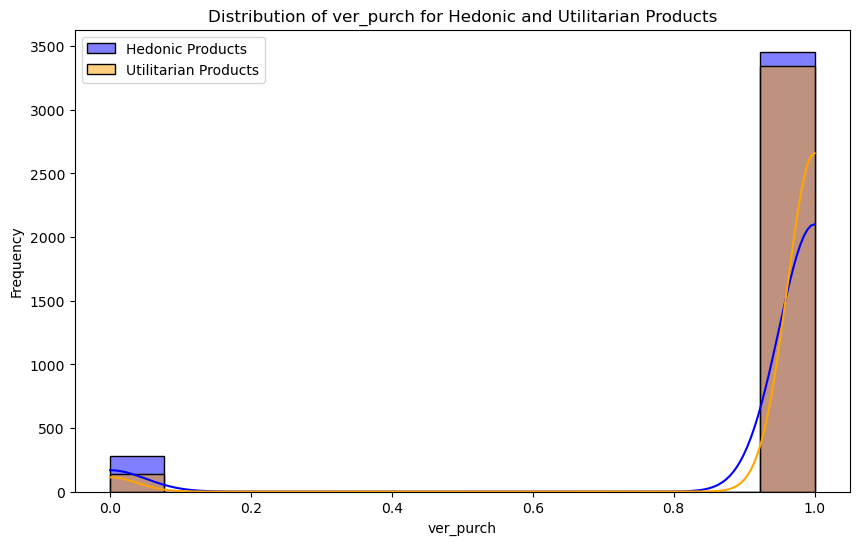

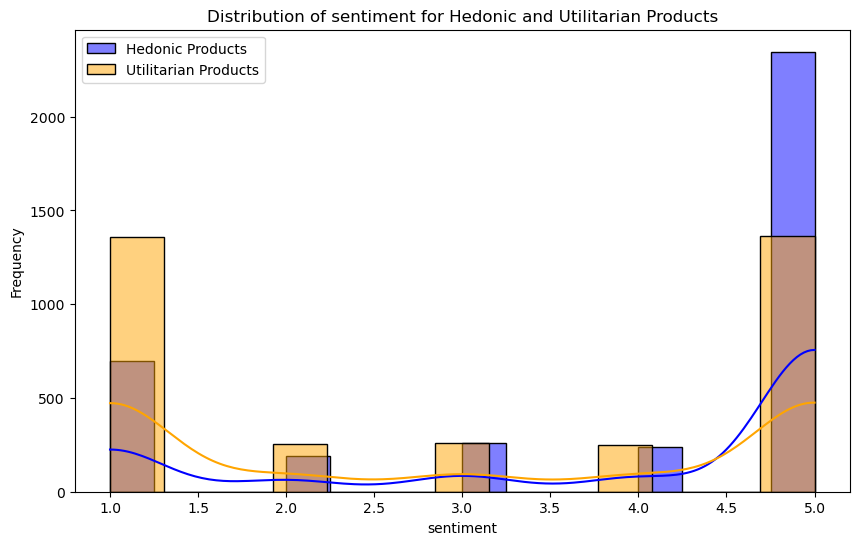

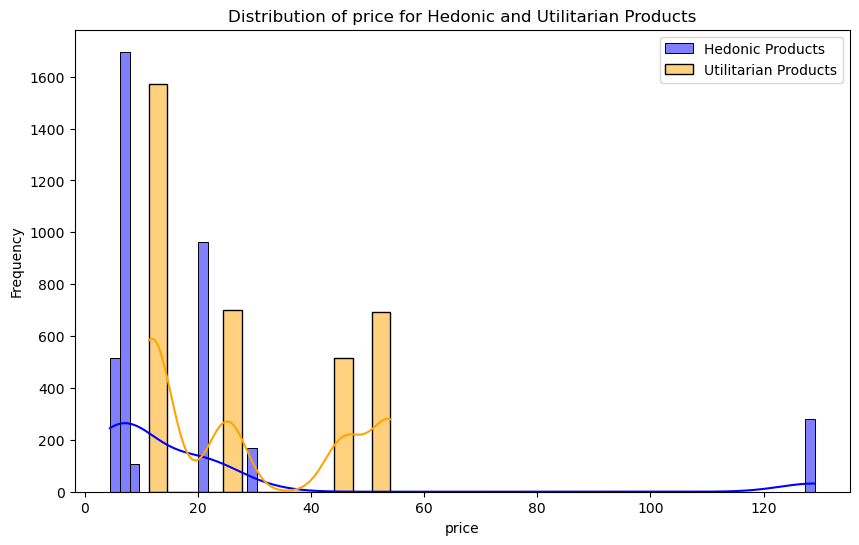

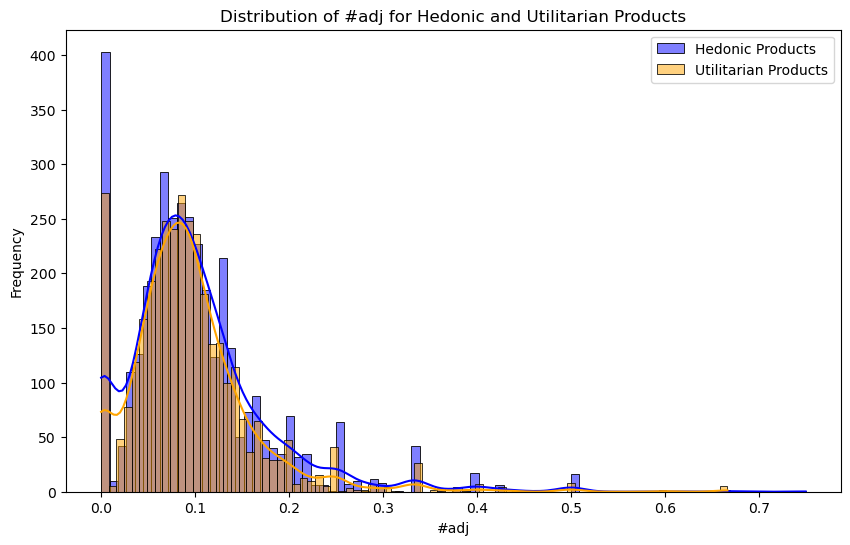

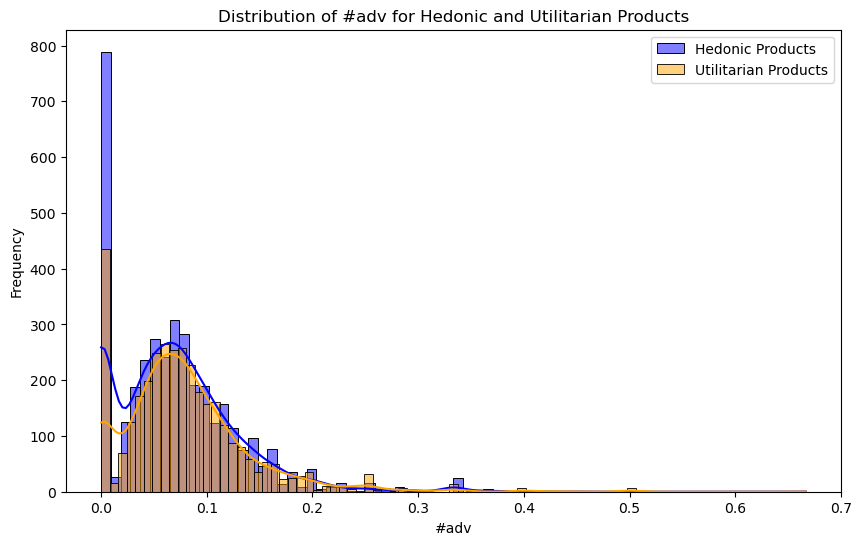

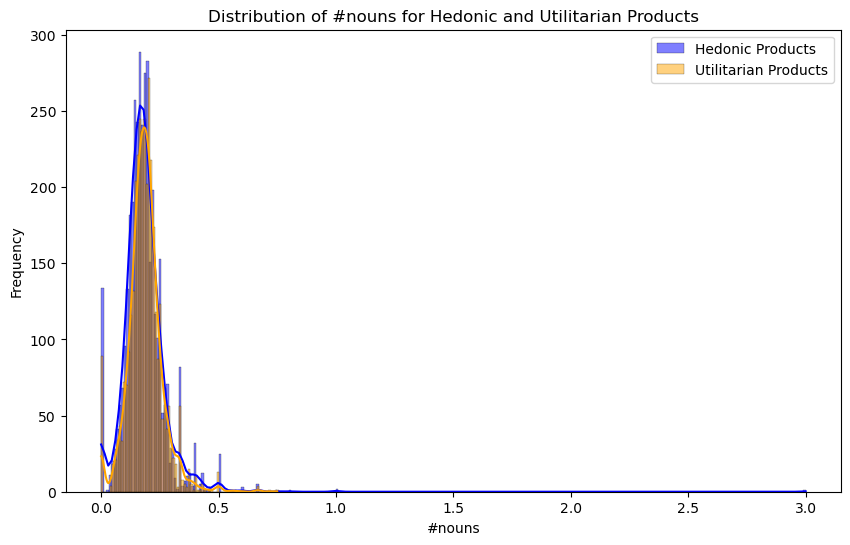

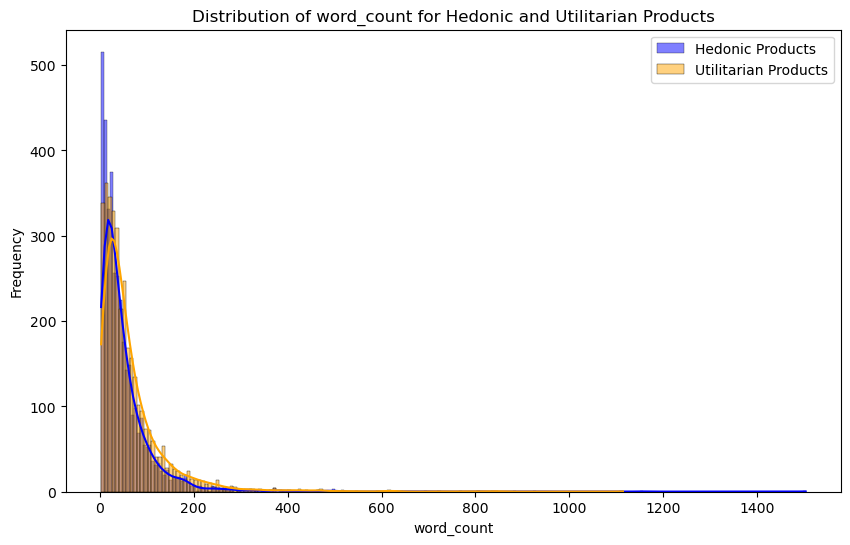

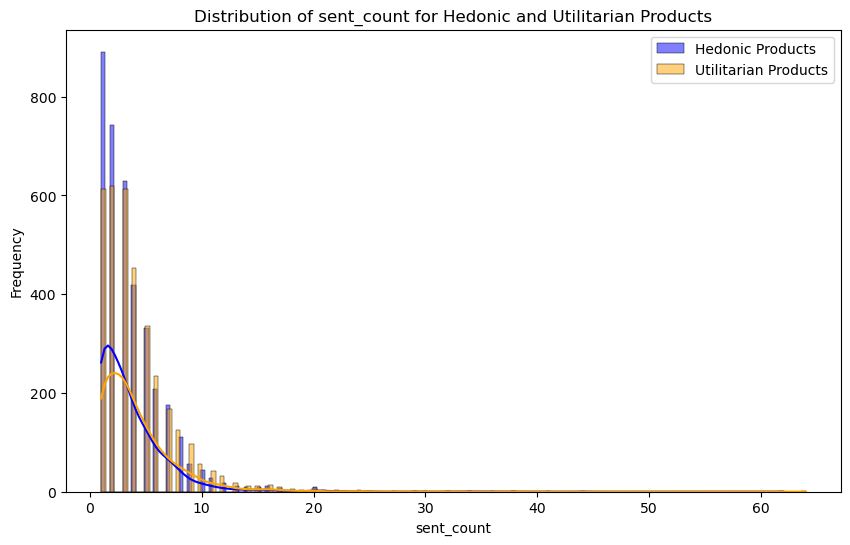

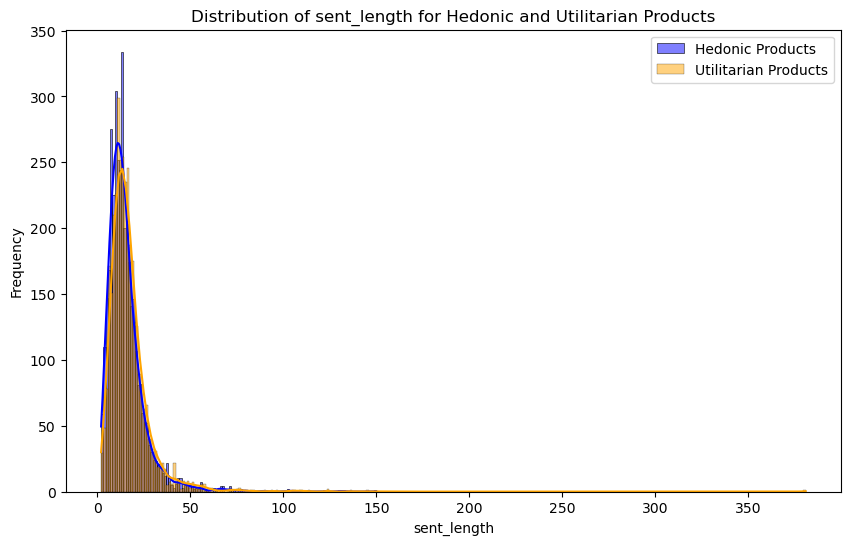

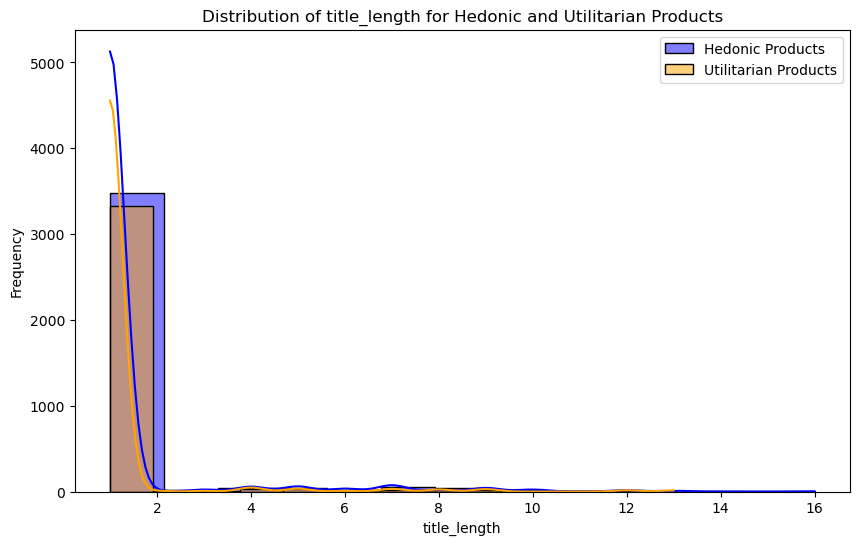

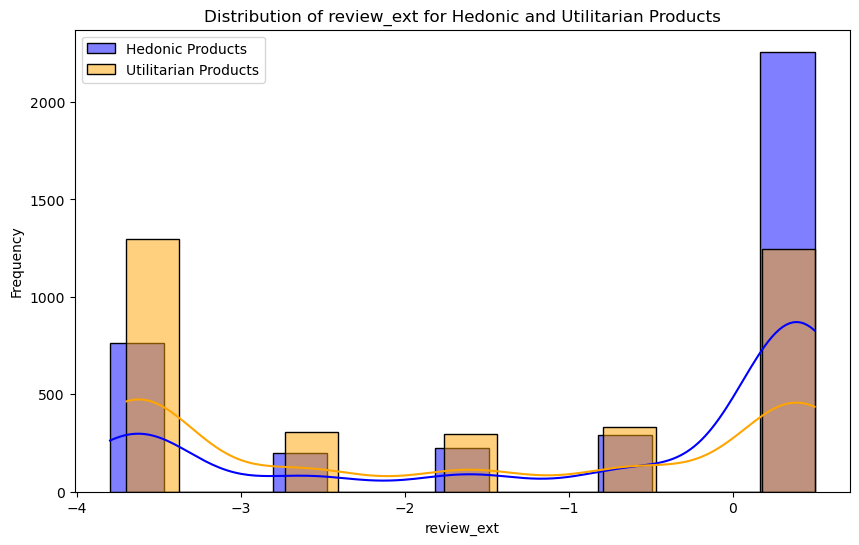

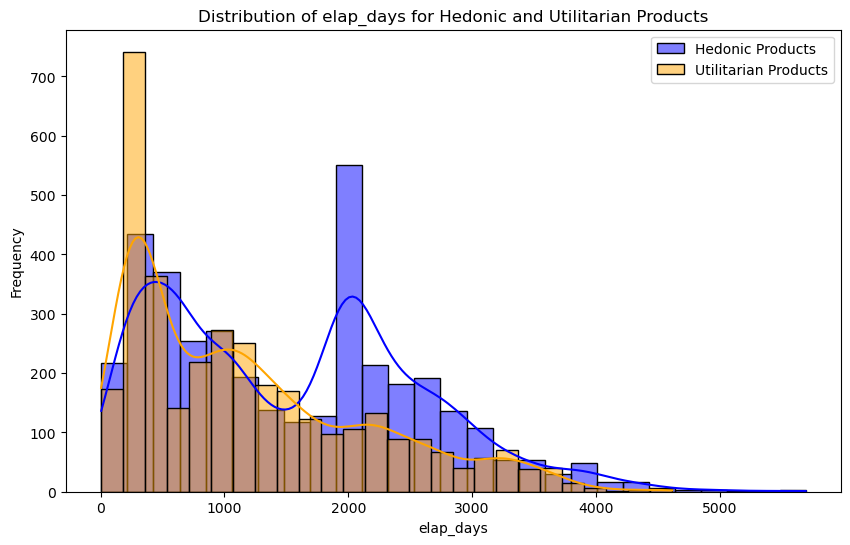

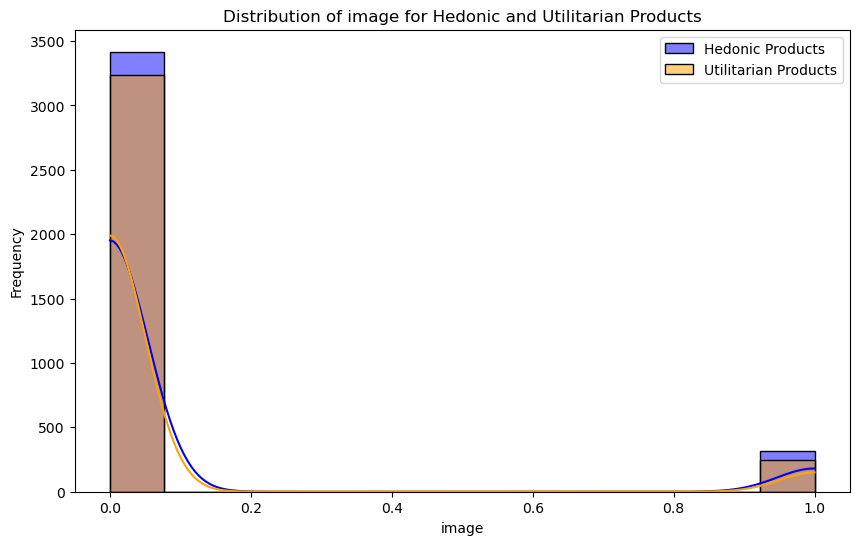

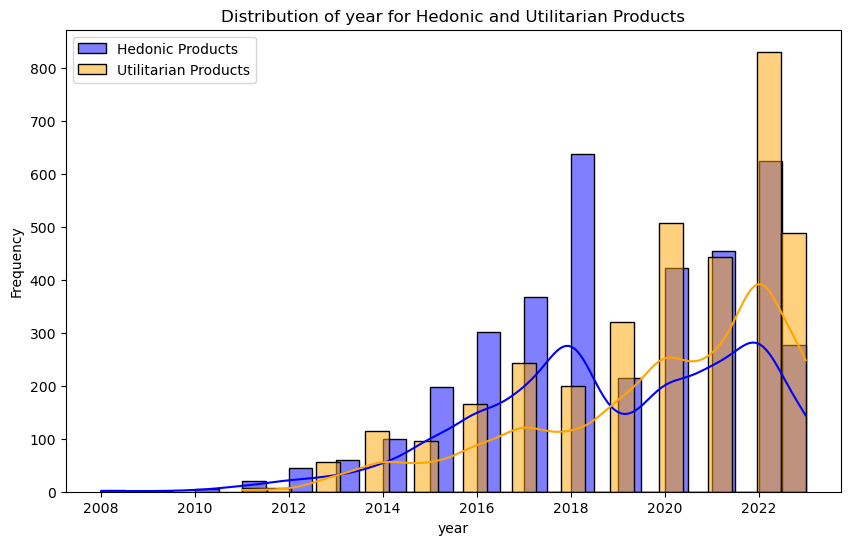

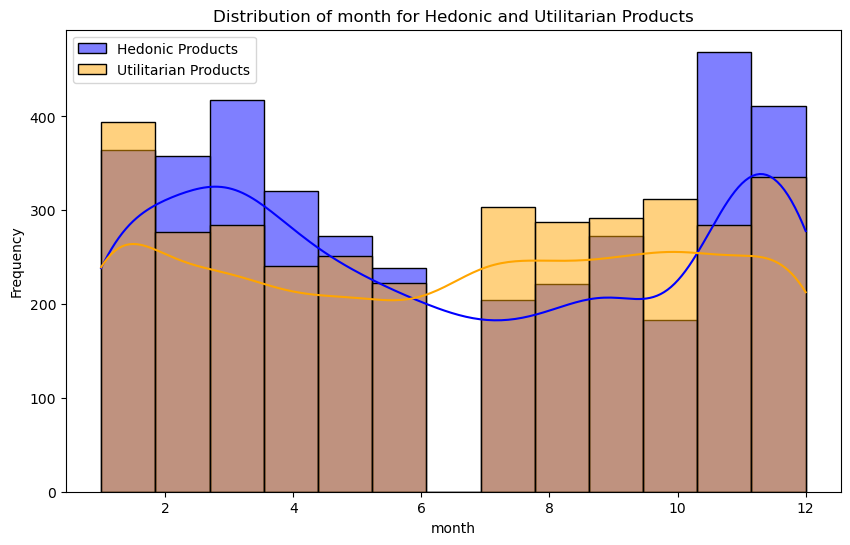

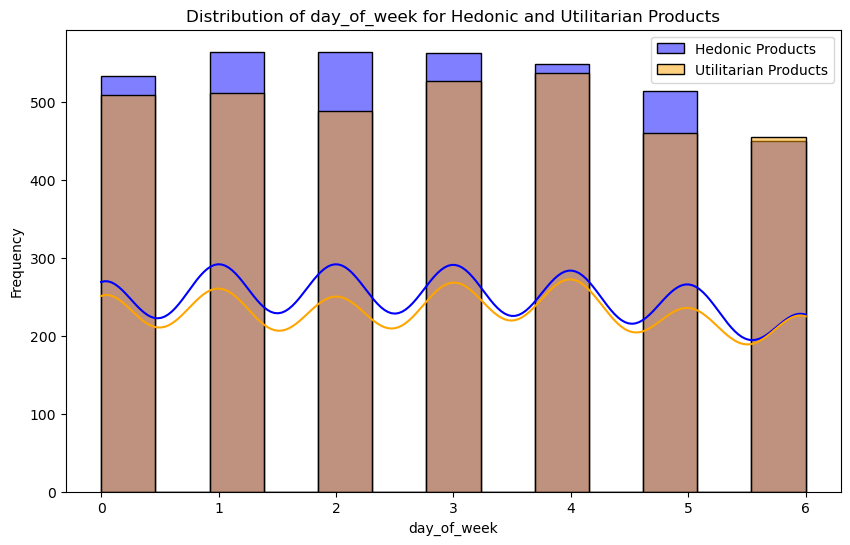

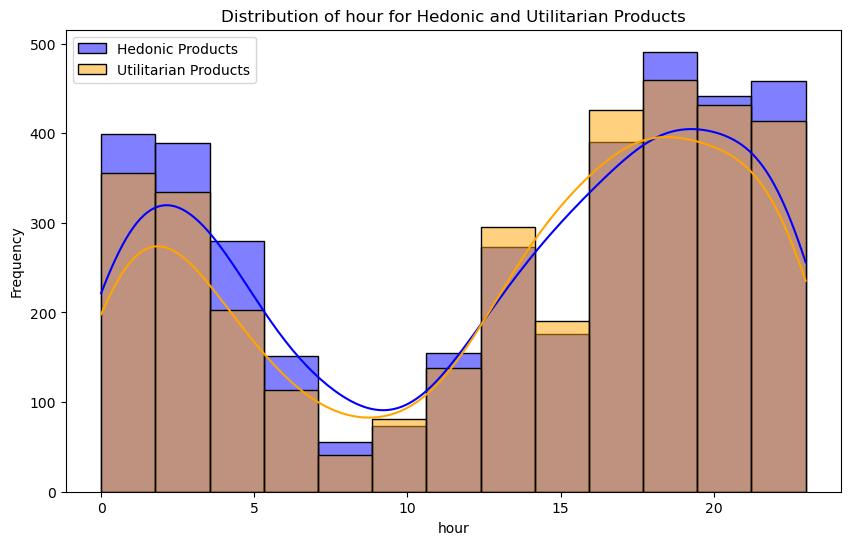

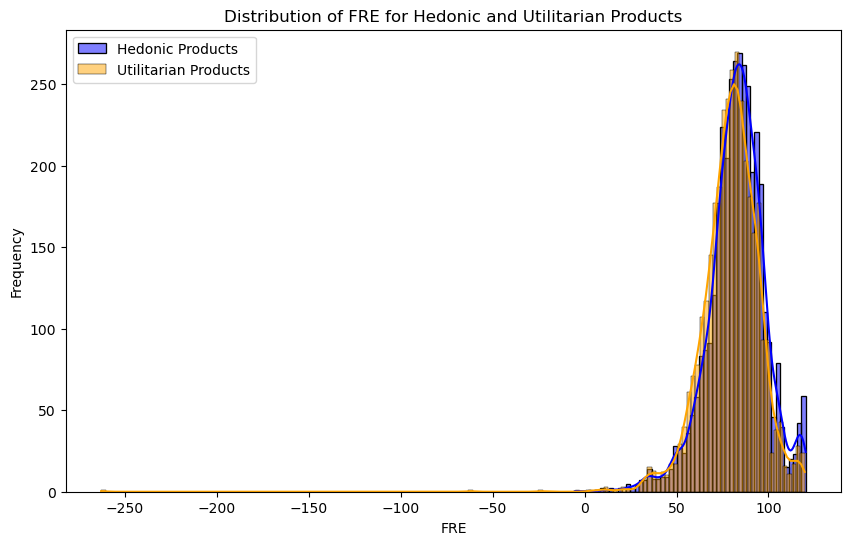

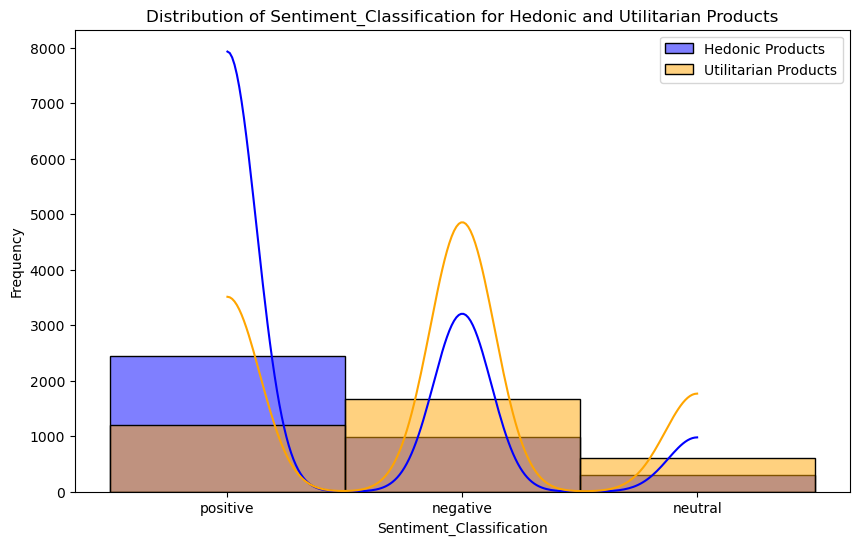

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day_of_week', 'hour','FRE','Sentiment_Classification'
]


# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(data_hedonic[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(data_utilitarian[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


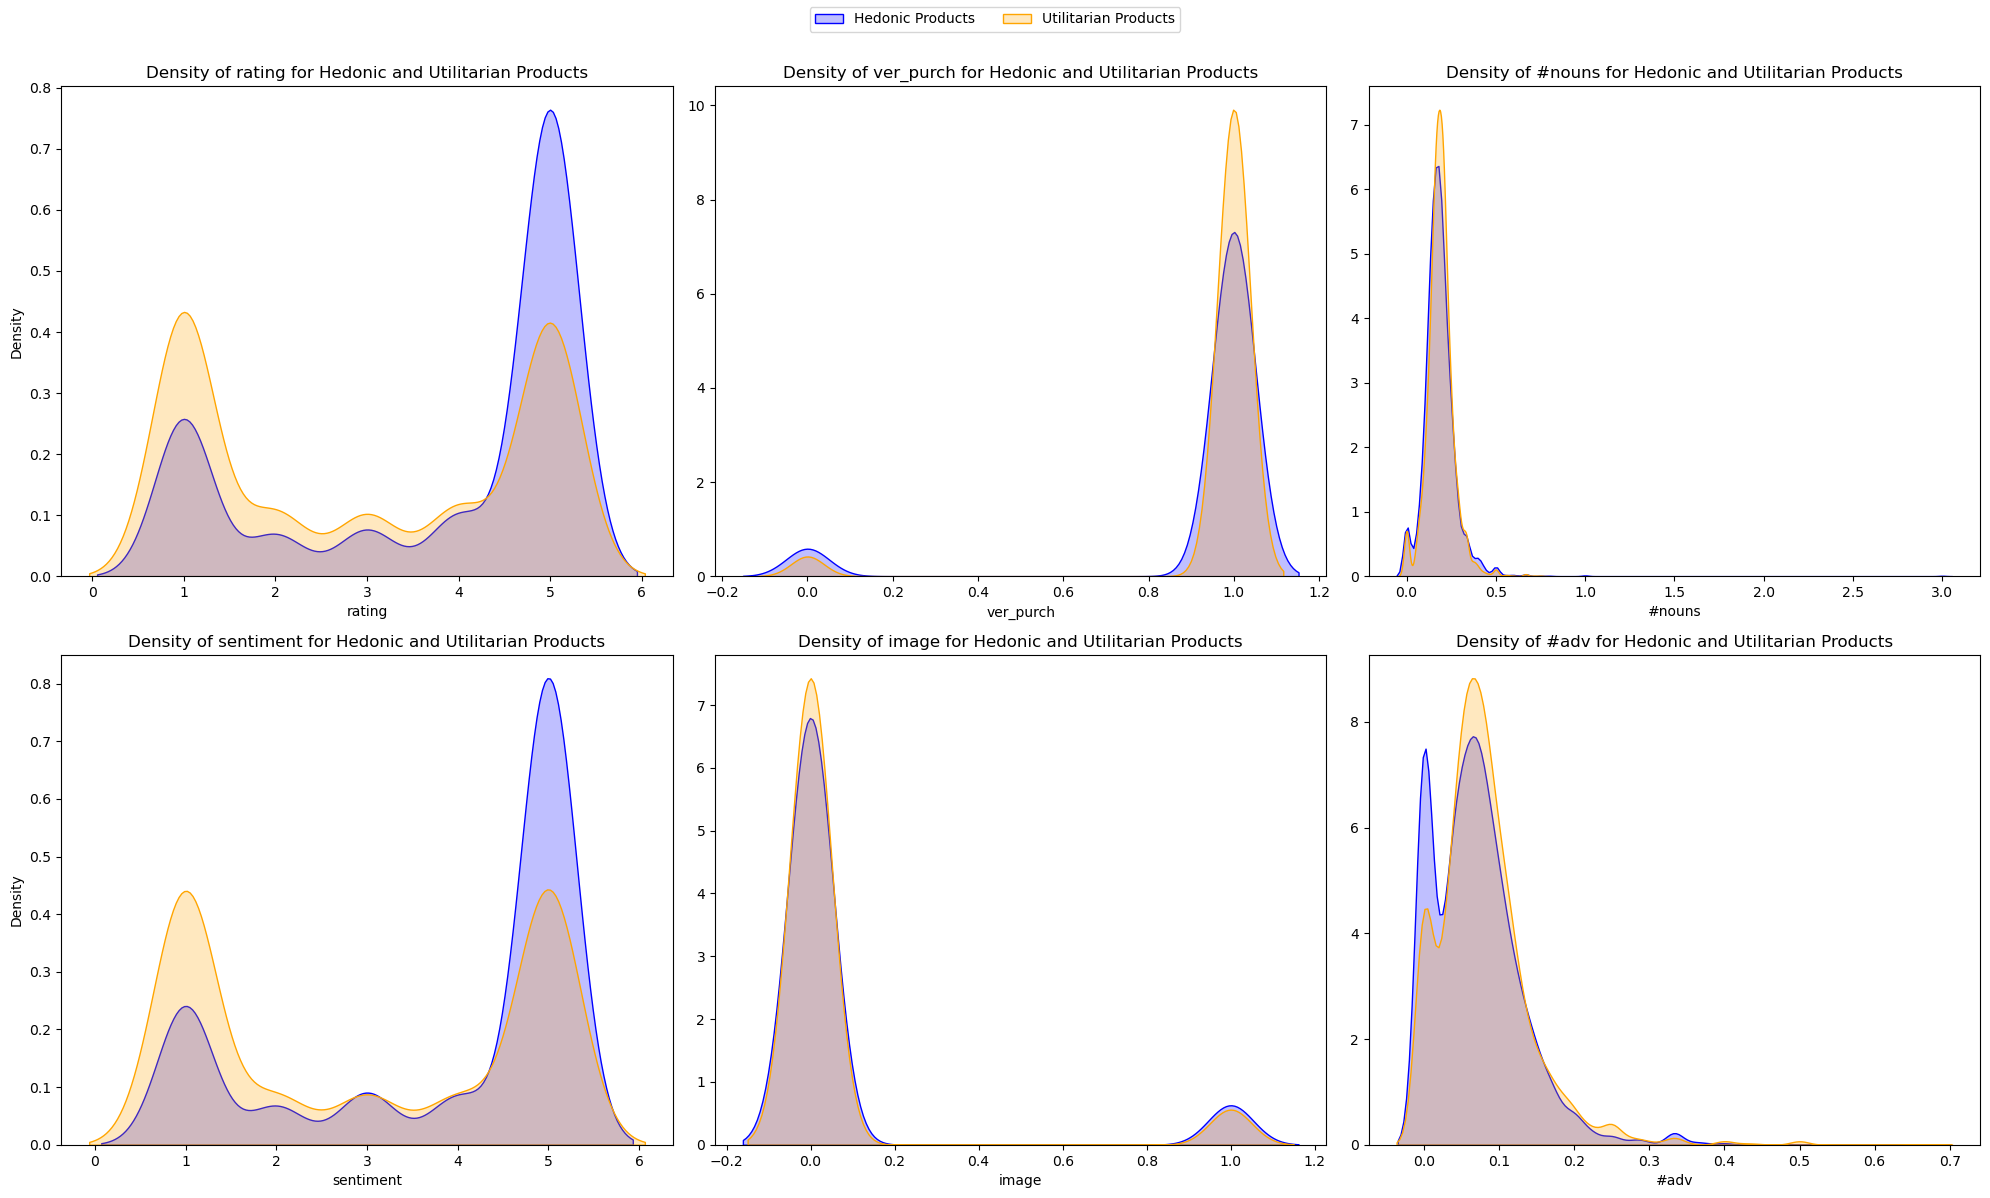

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'ver_purch','#nouns', 'sentiment', 'image', '#adv',
]

# Set up the grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # Adjust the grid size if needed
axes = axes.flatten()

# Plot the density plots
for ax, feature in zip(axes, features):
    sns.kdeplot(data=data_hedonic[feature], color='blue', label='Hedonic Products', ax=ax, fill=True)
    sns.kdeplot(data=data_utilitarian[feature], color='orange', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_title(f'Density of {feature} for Hedonic and Utilitarian Products')
    ax.set_xlabel(feature)
    if ax in axes[::3]:  # Label Y-axis only for the leftmost plots
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')
    
    # Remove individual legends
    ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for the legend
plt.show()


In [23]:
# Adding the 'helpful' column to the data dictionary
data['helpful'] = [votes >= 1 for votes in data['helpful_vote']]

# Creating the DataFrame with the updated data dictionary
data = pd.DataFrame(data)


# Display the updated DataFrame
print(data)

       Unnamed: 0  rating                                            title_x  \
0               0     5.0                                          Love this   
1               1     5.0  The fun games that you remember.. now on the N...   
2               2     5.0                                      So much fun!!   
3               3     5.0                              Wish this had more...   
4               4     5.0    It is the physical copy and it is a good price.   
...           ...     ...                                                ...   
22086       22086     5.0                                      Works wonders   
22087       22087     5.0                                          Resultado   
22088       22088     5.0                                         Amazing!!!   
22089       22089     5.0    This brush has lifted a weight off my shoulders   
22090       22090     5.0  Amazing! Effortlessly detangles without causin...   

                                       

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Apply log transformation to the 'word_count' column
data['log_word_count'] = np.log1p(data['word_count'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create the violin plot with log-transformed data
plt.figure(figsize=(10, 6),dpi=1000)
sns.violinplot(x="helpful_label", y="log_word_count", hue="prod_type_label", data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("log (word_count)",size=14)
plt.xlabel("")
plt.tight_layout()
plt.legend(title='Product Type', title_fontsize='14', fontsize='13')
plt.show()


In [25]:
# Apply log transformation to the 'word_count' and 'sent_length' columns
data['log_word_count'] = np.log1p(data['word_count'])
data['log_sent_length'] = np.log1p(data['sent_length'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=1000)

# Plot violin plot for log-transformed word_count
sns.violinplot(ax=axes[0], x="helpful_label", y="log_word_count", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[0].set_ylabel("log (word_count)", size=13)
axes[0].set_xlabel("")
axes[0].legend_.remove()  # Remove legend from the first plot

# Increase the font size of the x-axis and y-axis labels in the left plot
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=13)

# Plot violin plot for log-transformed sent_length
sns.violinplot(ax=axes[1], x="helpful_label", y="log_sent_length", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[1].set_ylabel("log (sent_length)", size=14)
axes[1].set_xlabel("")

axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=13)

# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='14', fontsize='14', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_27398/1963201559.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})


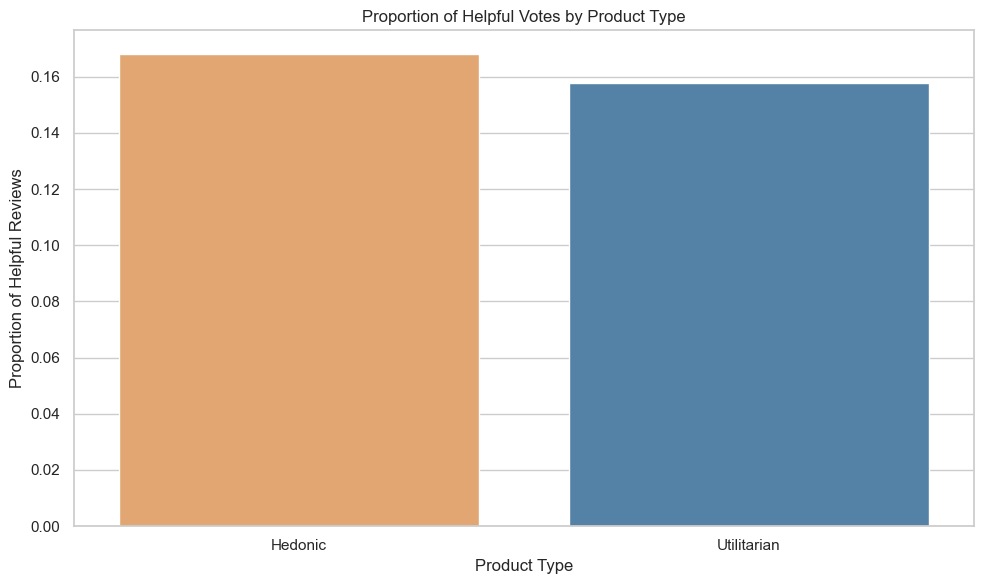

In [26]:
# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data['helpful_label'] = data['helpful'].map({True: 'Helpful', False: 'Not Helpful'})

# Calculate the proportion of helpful reviews for each product type
helpful_proportion = data.groupby('prod_type_label')['helpful'].mean().reset_index()

# Set the theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("Proportion of Helpful Reviews")
plt.xlabel("Product Type")
plt.title("Proportion of Helpful Votes by Product Type")
plt.tight_layout()
plt.show()

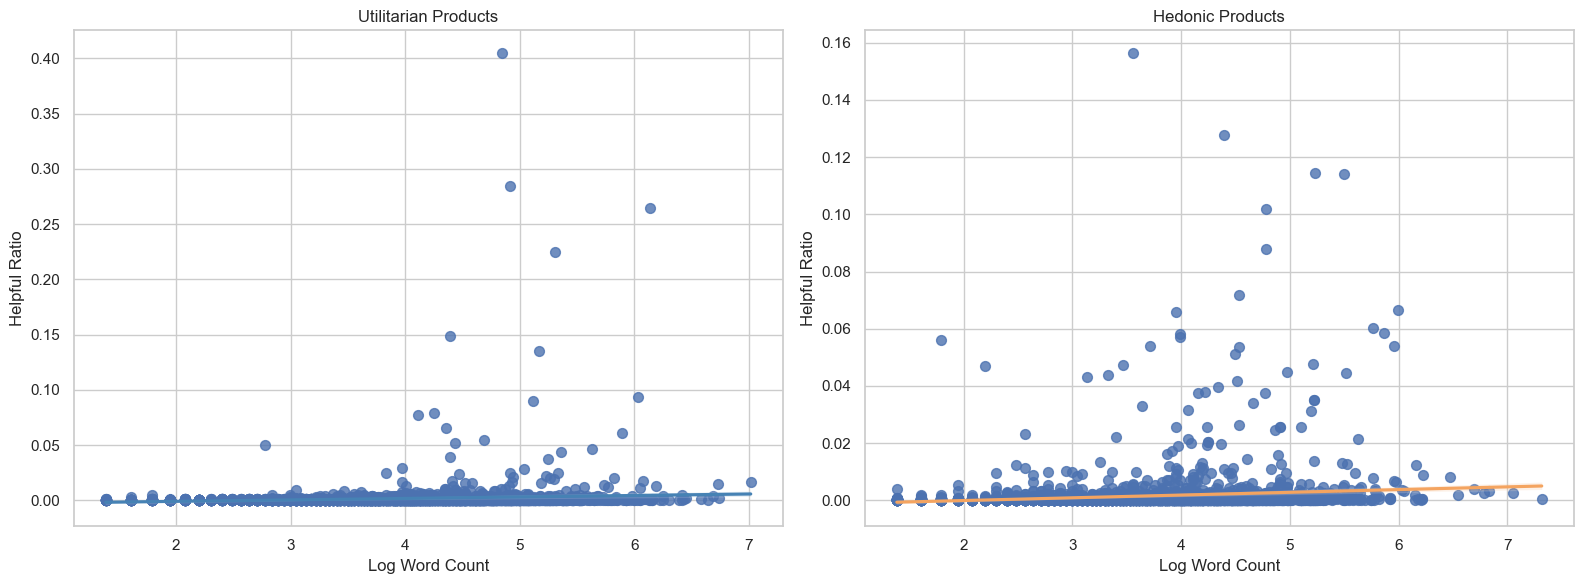

In [27]:
# Log-transform the word_count
data_helpful['log_word_count'] = np.log1p(data_helpful['word_count'])

# Map product types to labels
data_helpful['prod_type_label'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for Utilitarian products
sns.regplot(ax=axes[0], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 0], scatter_kws={'s': 50}, line_kws={'color': 'steelblue'})
axes[0].set_title('Utilitarian Products')
axes[0].set_xlabel('Log Word Count')
axes[0].set_ylabel('Helpful Ratio')

# Scatter plot with regression line for Hedonic products
sns.regplot(ax=axes[1], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 1], scatter_kws={'s': 50}, line_kws={'color': 'sandybrown'})
axes[1].set_title('Hedonic Products')
axes[1].set_xlabel('Log Word Count')
axes[1].set_ylabel('Helpful Ratio')

plt.tight_layout()
plt.show()

/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_27398/2005127216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product', y='sentiment', data=data_helpful, palette='Set2')


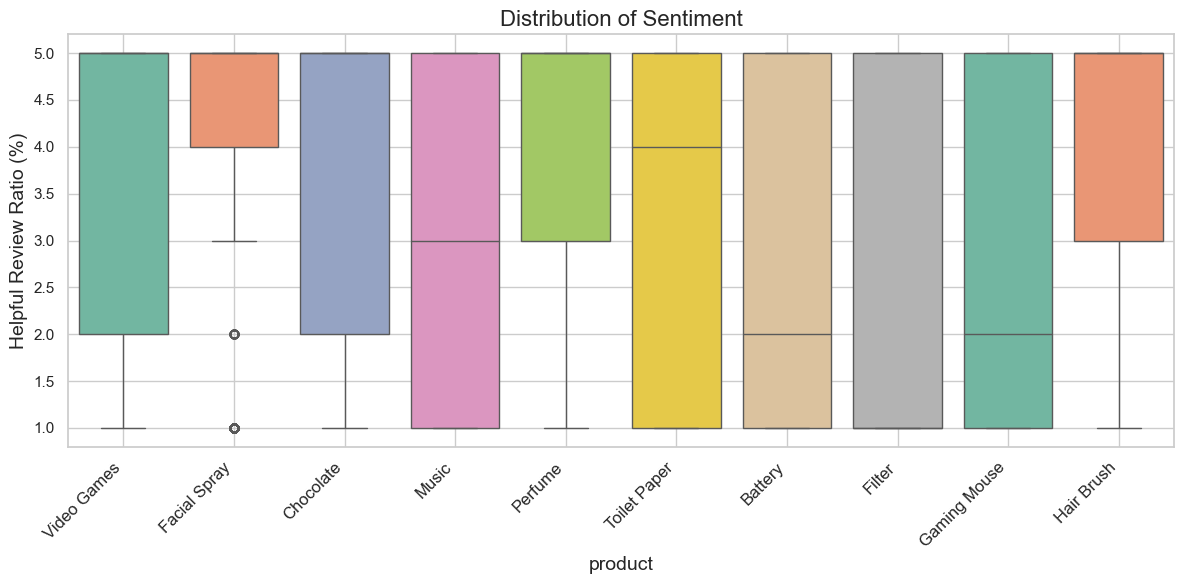

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot for hedonic products
plt.figure(figsize=(12, 6))
sns.boxplot(x='product', y='sentiment', data=data_helpful, palette='Set2')
plt.title('Distribution of Sentiment', fontsize=16)
plt.xlabel('product', fontsize=14)
plt.ylabel('Helpful Review Ratio (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Analyzing n_Grams by sentiment 

In [29]:
word_counts = {}
for text in data_hedonic['text_cleaned1']:
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()  # Split the text into words
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1



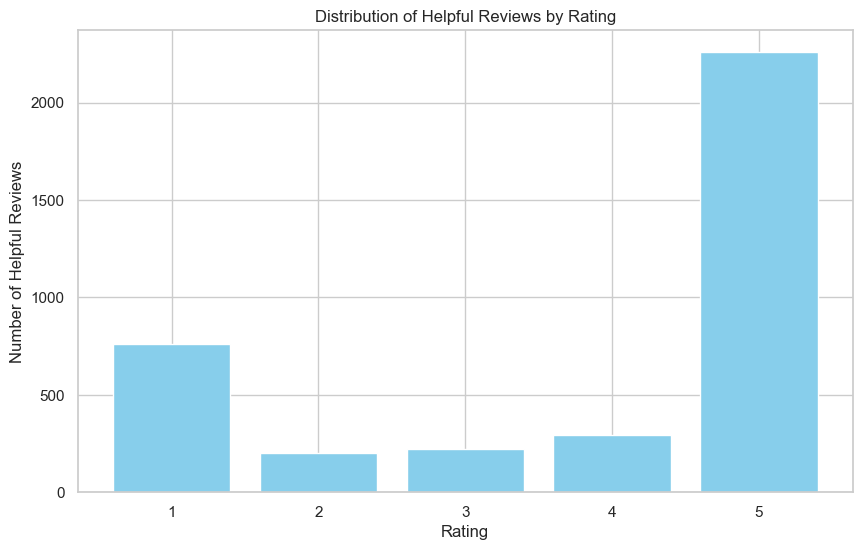

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate counts for each rating with at least 1 helpful vote
helpful_reviews_count_by_rating = data_hedonic['rating'][data_hedonic['helpful_vote'] > 0].value_counts()

# Plot a bar chart to visualize the distribution of helpful reviews by rating
plt.figure(figsize=(10, 6))
plt.bar(helpful_reviews_count_by_rating.index, helpful_reviews_count_by_rating.values, color='skyblue')
plt.title('Distribution of Helpful Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Helpful Reviews')
plt.xticks(helpful_reviews_count_by_rating.index)  # Ensure all ratings are displayed on x-axis
plt.grid(True)
plt.show()


In [31]:
word_counts_positive = {}
word_counts_negative = {}
word_counts_neutral = {}

for index, row in data_hedonic.iterrows():
    text = row['text_cleaned1']
    sentiment = row['Sentiment_Classification']
    
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()  # Split the text into words
        
        # Count words based on sentiment classification
        if sentiment == 'positive':
            for word in words:
                if word in word_counts_positive:
                    word_counts_positive[word] += 1
                else:
                    word_counts_positive[word] = 1
        elif sentiment == 'negative':
            for word in words:
                if word in word_counts_negative:
                    word_counts_negative[word] += 1
                else:
                    word_counts_negative[word] = 1
        elif sentiment == 'neutral':
            for word in words:
                if word in word_counts_neutral:
                    word_counts_neutral[word] += 1
                else:
                    word_counts_neutral[word] = 1


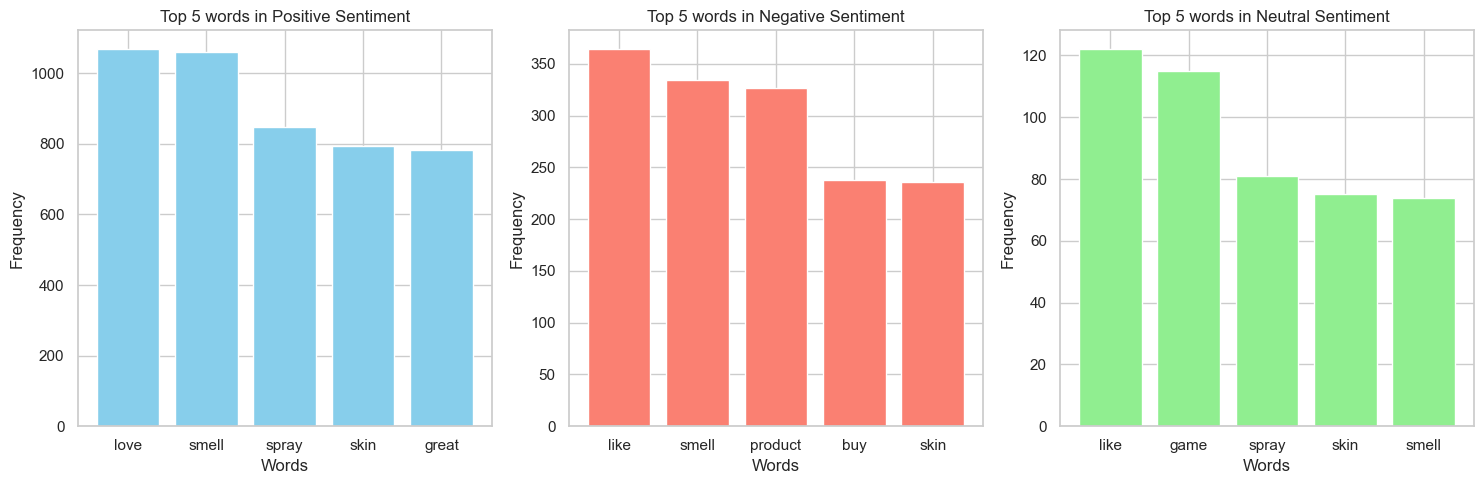

In [32]:
import matplotlib.pyplot as plt

# Sort the word counts for each sentiment category
top_words_positive = sorted(word_counts_positive.items(), key=lambda x: x[1], reverse=True)[:5]
top_words_negative = sorted(word_counts_negative.items(), key=lambda x: x[1], reverse=True)[:5]
top_words_neutral = sorted(word_counts_neutral.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract words and counts for plotting
words_positive, counts_positive = zip(*top_words_positive)
words_negative, counts_negative = zip(*top_words_negative)
words_neutral, counts_neutral = zip(*top_words_neutral)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(words_positive, counts_positive, color='skyblue')
plt.title('Top 5 words in Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(132)
plt.bar(words_negative, counts_negative, color='salmon')
plt.title('Top 5 words in Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(133)
plt.bar(words_neutral, counts_neutral, color='lightgreen')
plt.title('Top 5 words in Neutral Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [33]:
def classify_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to the sentiment column
data['Sentiment_Classification2'] = data['sentiment'].apply(classify_sentiment)


In [34]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

def plot_top_bigrams_by_product(data, text_column, sentiment_column, product_column):
    unique_products = data[product_column].unique()
    
    for product in unique_products:
        # Filter data for the current product
        product_data = data[data[product_column] == product]
        
        # Drop rows with missing values in the text column
        product_data = product_data.dropna(subset=[text_column])

        # Initialize CountVectorizer for bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))

        # Fit and transform the review text data
        X = vectorizer.fit_transform(product_data[text_column])

        # Get feature names (bigrams)
        feature_names = vectorizer.get_feature_names_out()

        # Initialize bigram counts for each sentiment category
        bigram_counts = defaultdict(lambda: defaultdict(int))

        # Iterate over each review text for the current product
        for index, sentiment in enumerate(product_data[sentiment_column]):
            # Get the indices of bigrams in the current review
            bigram_indices = X[index].indices
            # Increment bigram counts for the corresponding sentiment
            for bigram_index in bigram_indices:
                bigram_counts[sentiment][feature_names[bigram_index]] += 1

        # Sort the bigram counts for each sentiment category
        top_bigrams_by_sentiment = {}
        for sentiment, counts in bigram_counts.items():
            top_bigrams_by_sentiment[sentiment] = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:3]

        # Plotting
        plt.figure(figsize=(15, 5))
        for i, (sentiment, top_bigrams) in enumerate(top_bigrams_by_sentiment.items()):
            bigrams, counts = zip(*top_bigrams)

            plt.subplot(1, 3, i+1)
            plt.bar(bigrams, counts, color='skyblue' if sentiment == 'positive' else 'salmon' if sentiment == 'negative' else 'lightgreen')
            plt.title(f'Top 5 bigrams in {sentiment.capitalize()} Sentiment for {product}')
            plt.xlabel('Bigrams')
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()


In [35]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

def plot_top_bigrams_by_product(data, text_column, sentiment_column, product_column):
    unique_products = data[product_column].unique()
    
    for product in unique_products:
        # Filter data for the current product
        product_data = data[data[product_column] == product]
        
        # Drop rows with missing values in the text column
        product_data = product_data.dropna(subset=[text_column])

        # Initialize CountVectorizer for bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))

        # Fit and transform the review text data
        X = vectorizer.fit_transform(product_data[text_column])

        # Get feature names (bigrams)
        feature_names = vectorizer.get_feature_names_out()

        # Initialize bigram counts for each sentiment category
        bigram_counts = defaultdict(lambda: defaultdict(int))

        # Iterate over each review text for the current product
        for index, sentiment in enumerate(product_data[sentiment_column]):
            # Get the indices of bigrams in the current review
            bigram_indices = X[index].indices
            # Increment bigram counts for the corresponding sentiment
            for bigram_index in bigram_indices:
                bigram_counts[sentiment][feature_names[bigram_index]] += 1

        # Sort the bigram counts for each sentiment category
        top_bigrams_by_sentiment = {}
        for sentiment, counts in bigram_counts.items():
            # Sort bigrams by count
            sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
            # Select the fourth, fifth, and sixth most frequent bigrams
            top_bigrams_by_sentiment[sentiment] = sorted_counts[3:6]

        # Plotting
        plt.figure(figsize=(15, 5))
        for i, (sentiment, top_bigrams) in enumerate(top_bigrams_by_sentiment.items()):
            bigrams, counts = zip(*top_bigrams)

            plt.subplot(1, 3, i+1)
            plt.bar(bigrams, counts, color='skyblue' if sentiment == 'positive' else 'salmon' if sentiment == 'negative' else 'lightgreen')
            plt.title(f'Most frequent bigrams {sentiment.capitalize()} Sentiment for {product}')
            plt.xlabel('Bigrams')
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()



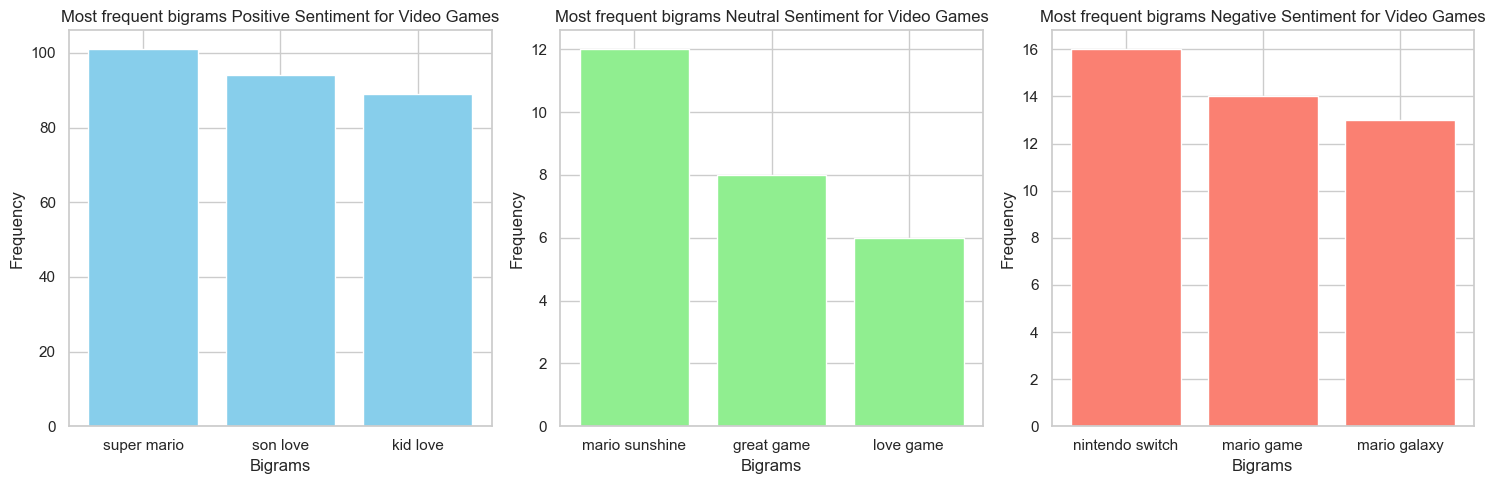

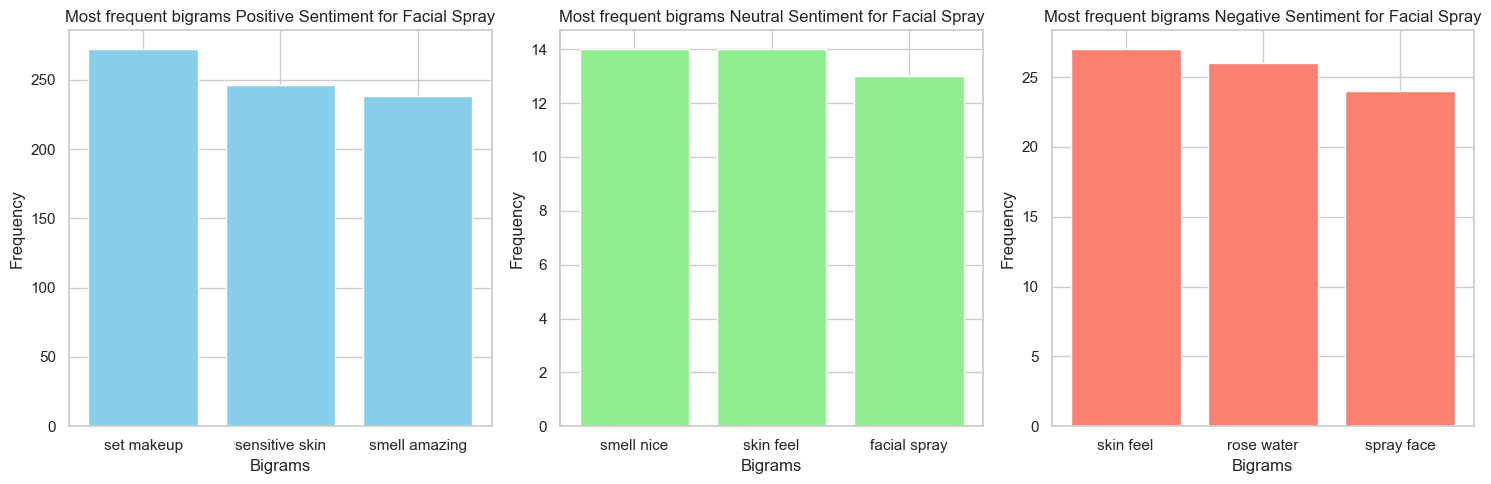

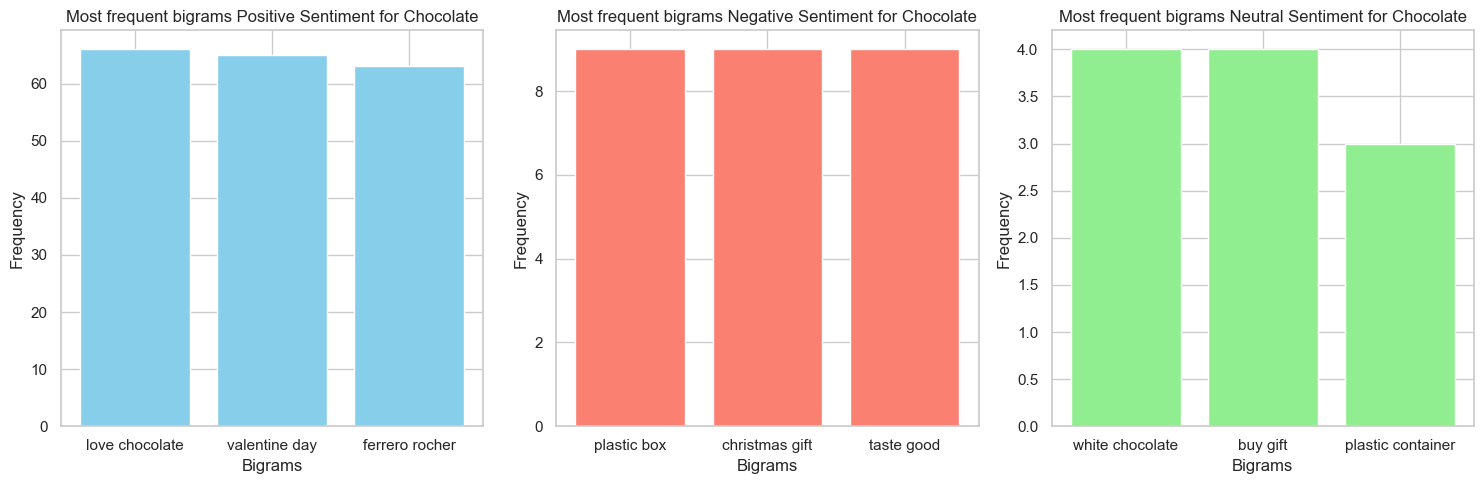

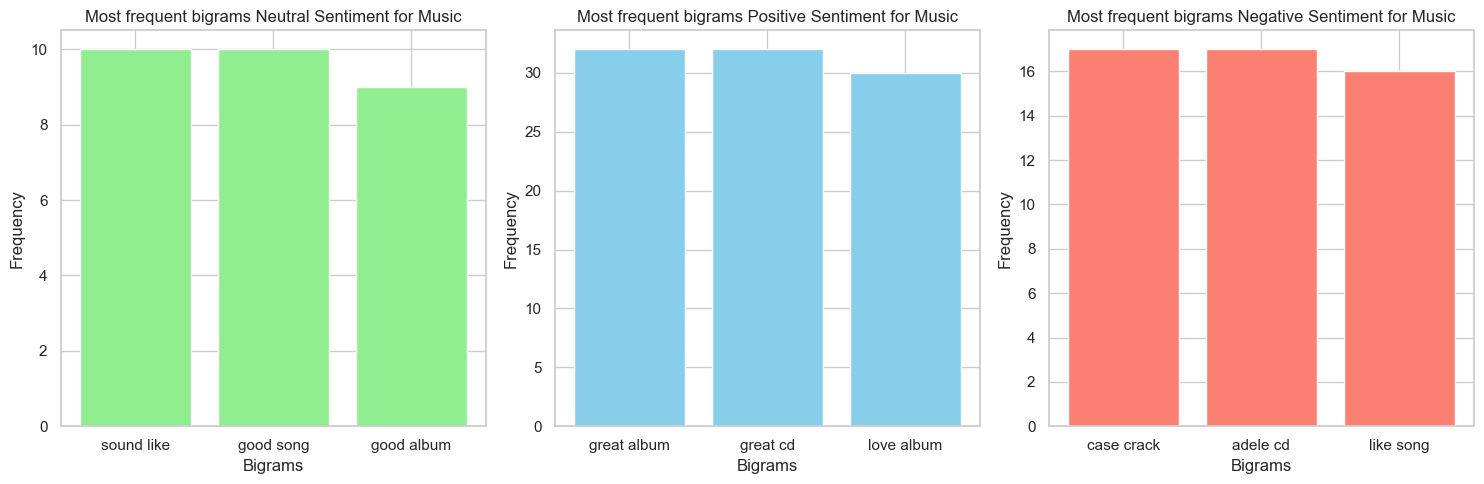

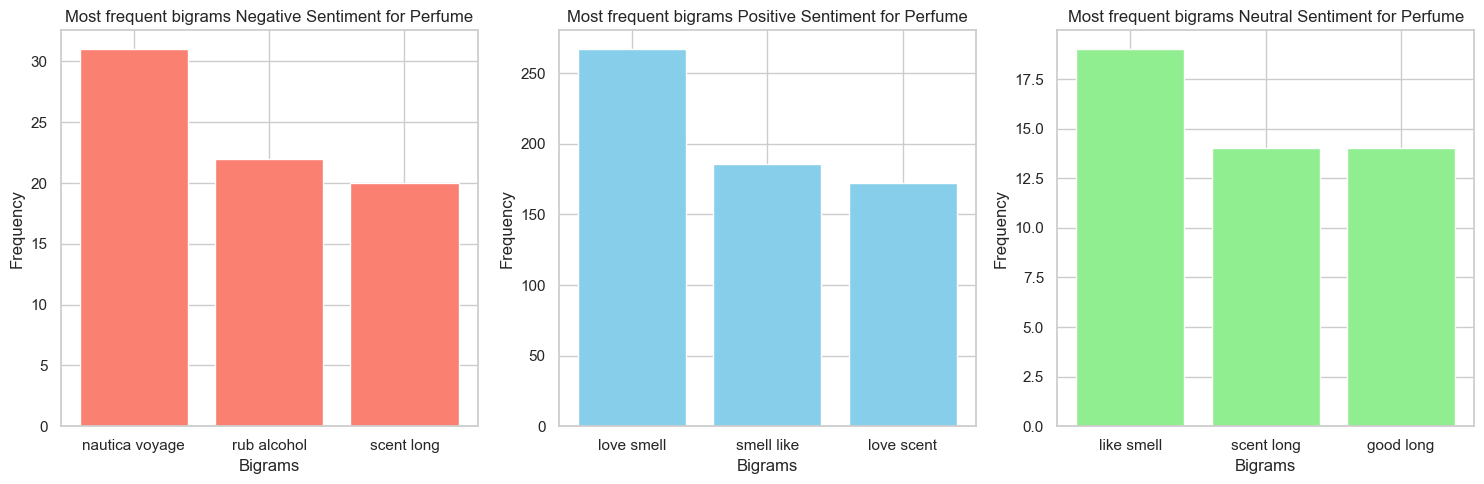

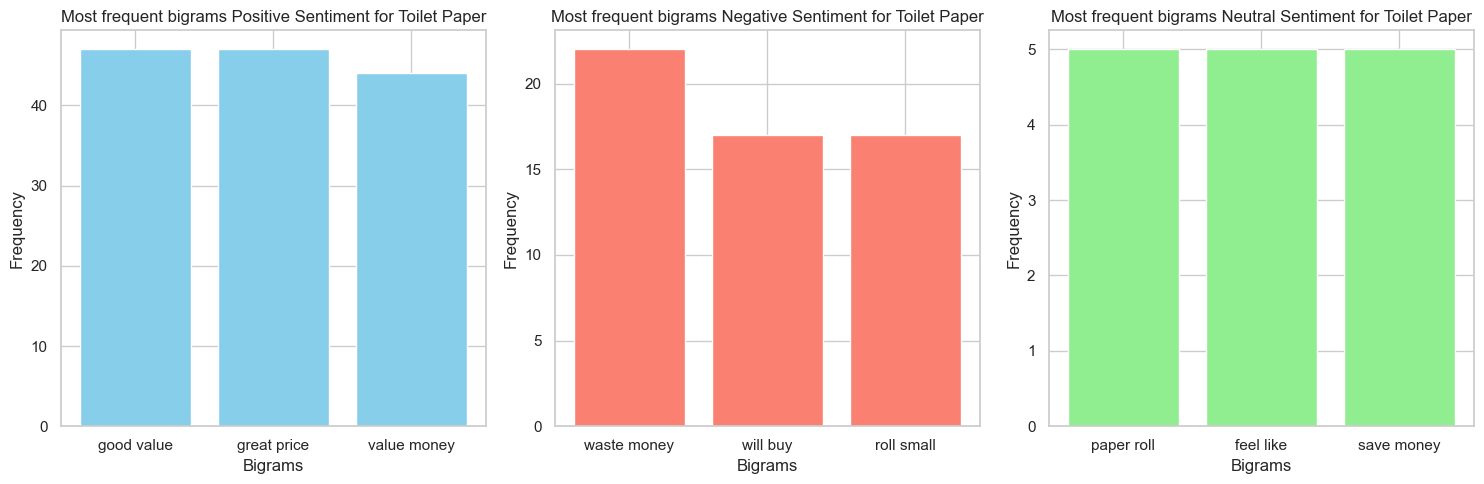

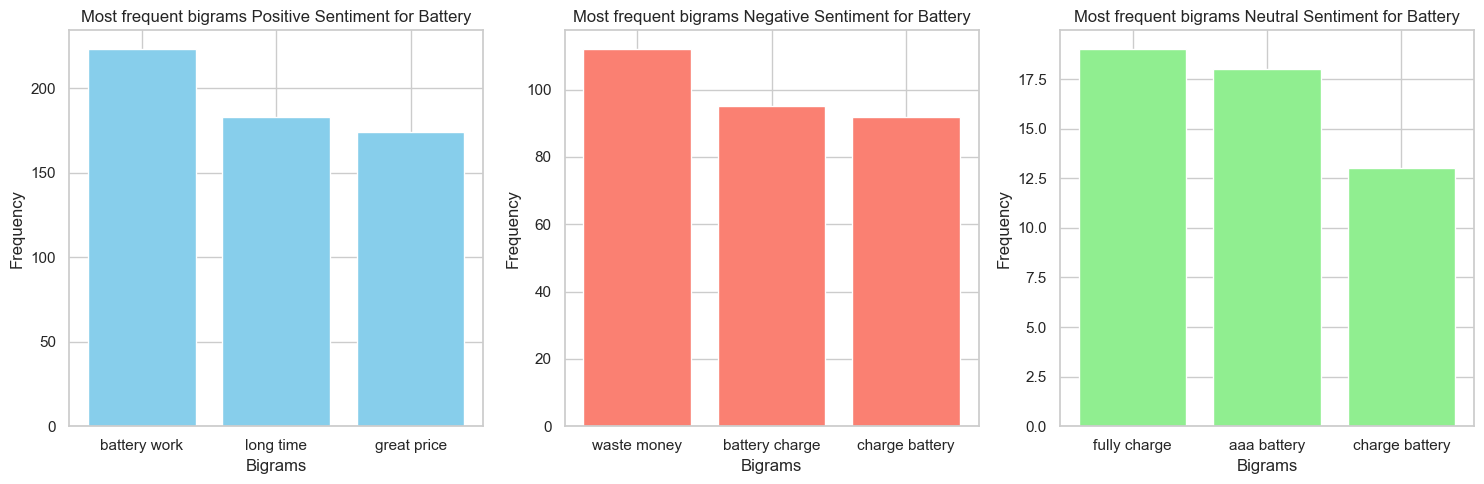

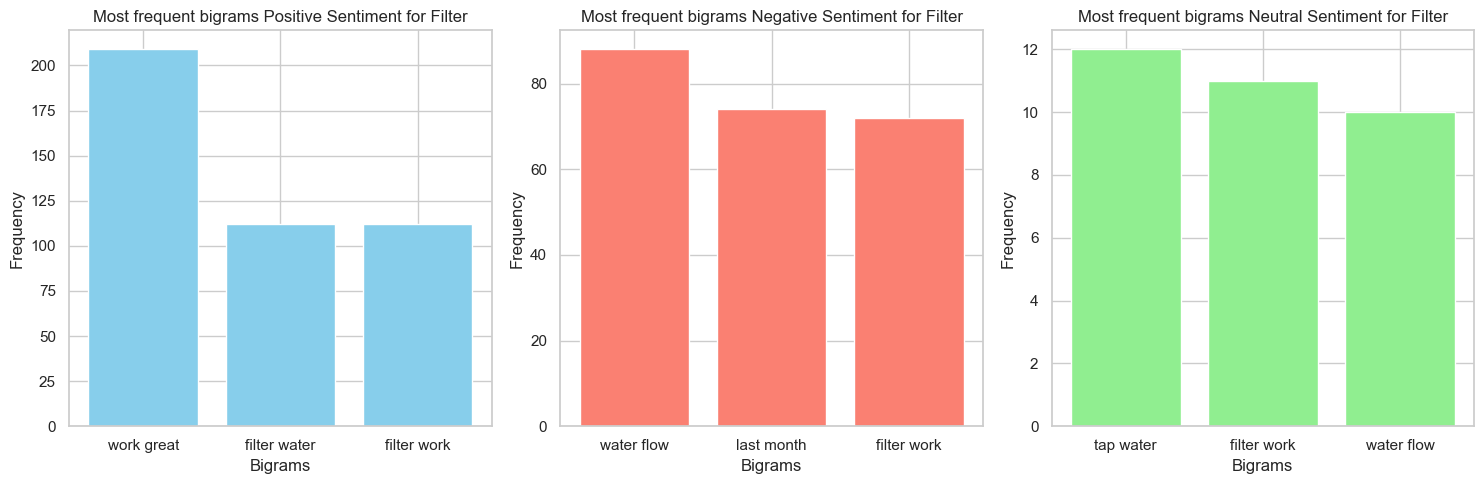

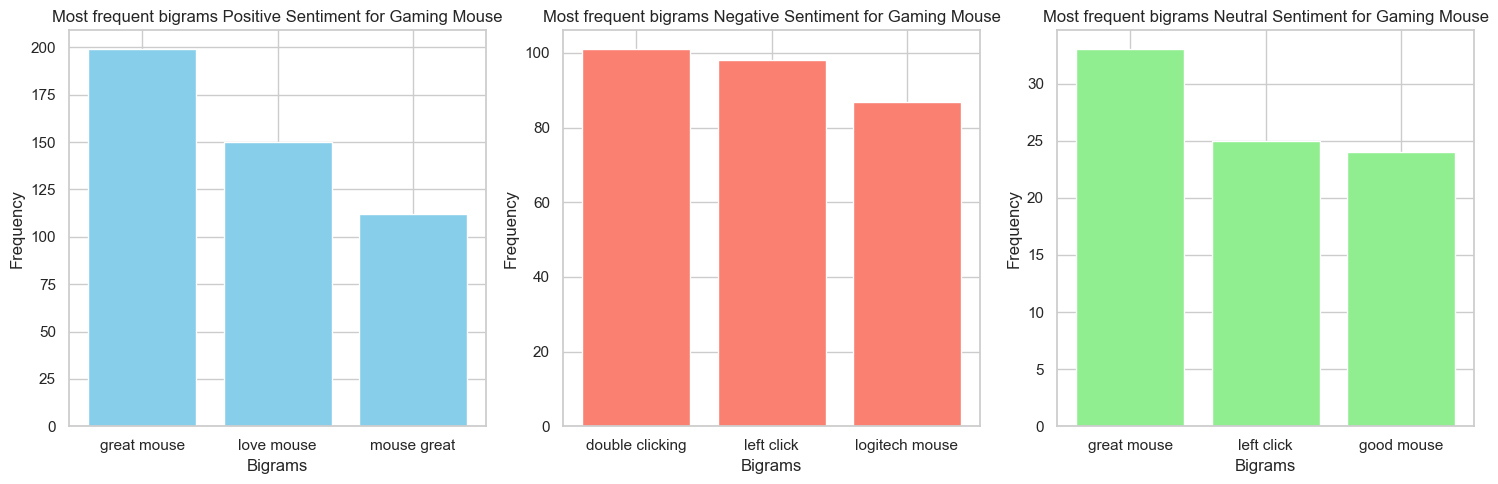

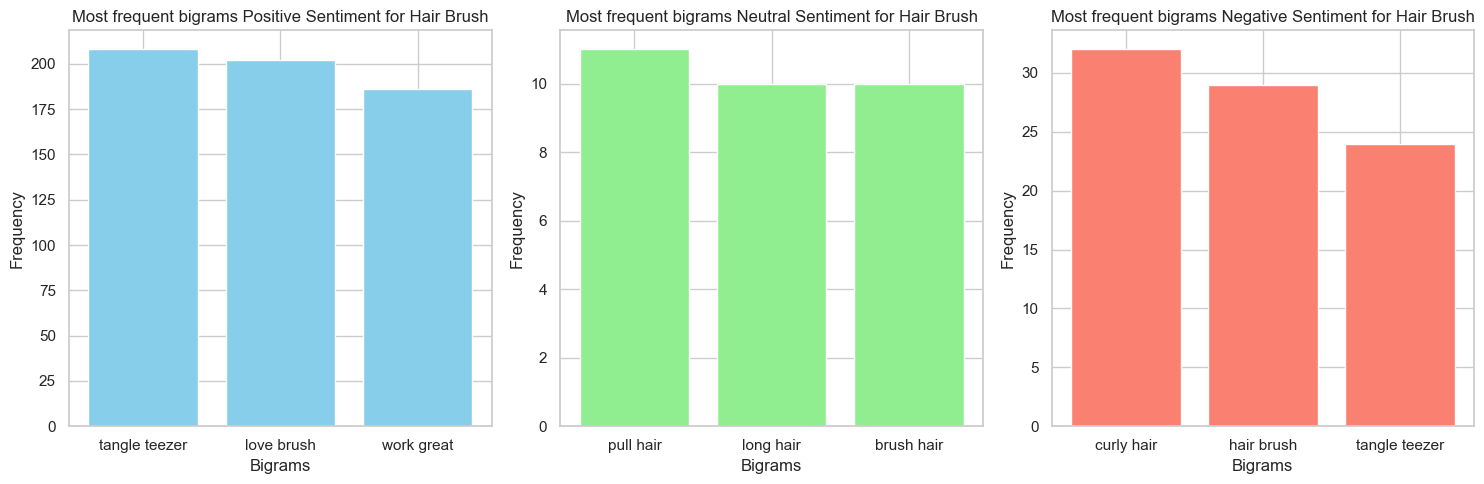

In [36]:
plot_top_bigrams_by_product (data, sentiment_column='Sentiment_Classification2', text_column='text_cleaned1', product_column='product' )